<a href="https://colab.research.google.com/github/kwakpovwe/kwakpovwe/blob/main/Application_of_Machine_Learning_on_Retail_Sales_Marketing_A_Flask_Based_Web_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application of Machine Learning on Retail Sales Marketing: A Flask Based Web Application

In [ ]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Installing Libraries

In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
## Import Pandas
import pandas as pd

# Read the Sales Dataset
data = pd.read_csv("sales_prediction.csv")

# Display the data
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

                                             |          | [  0%]   00:00 -> (? left)


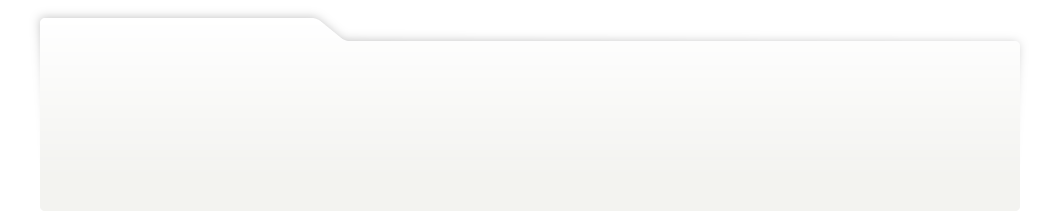
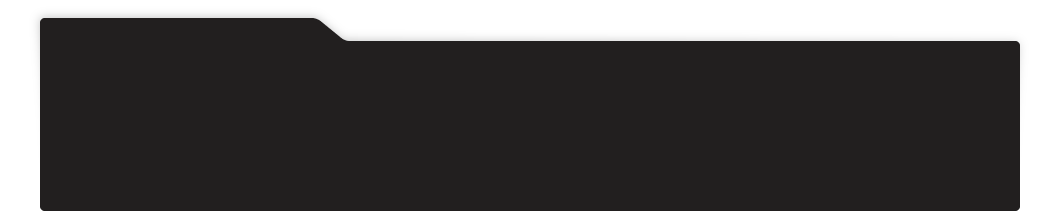
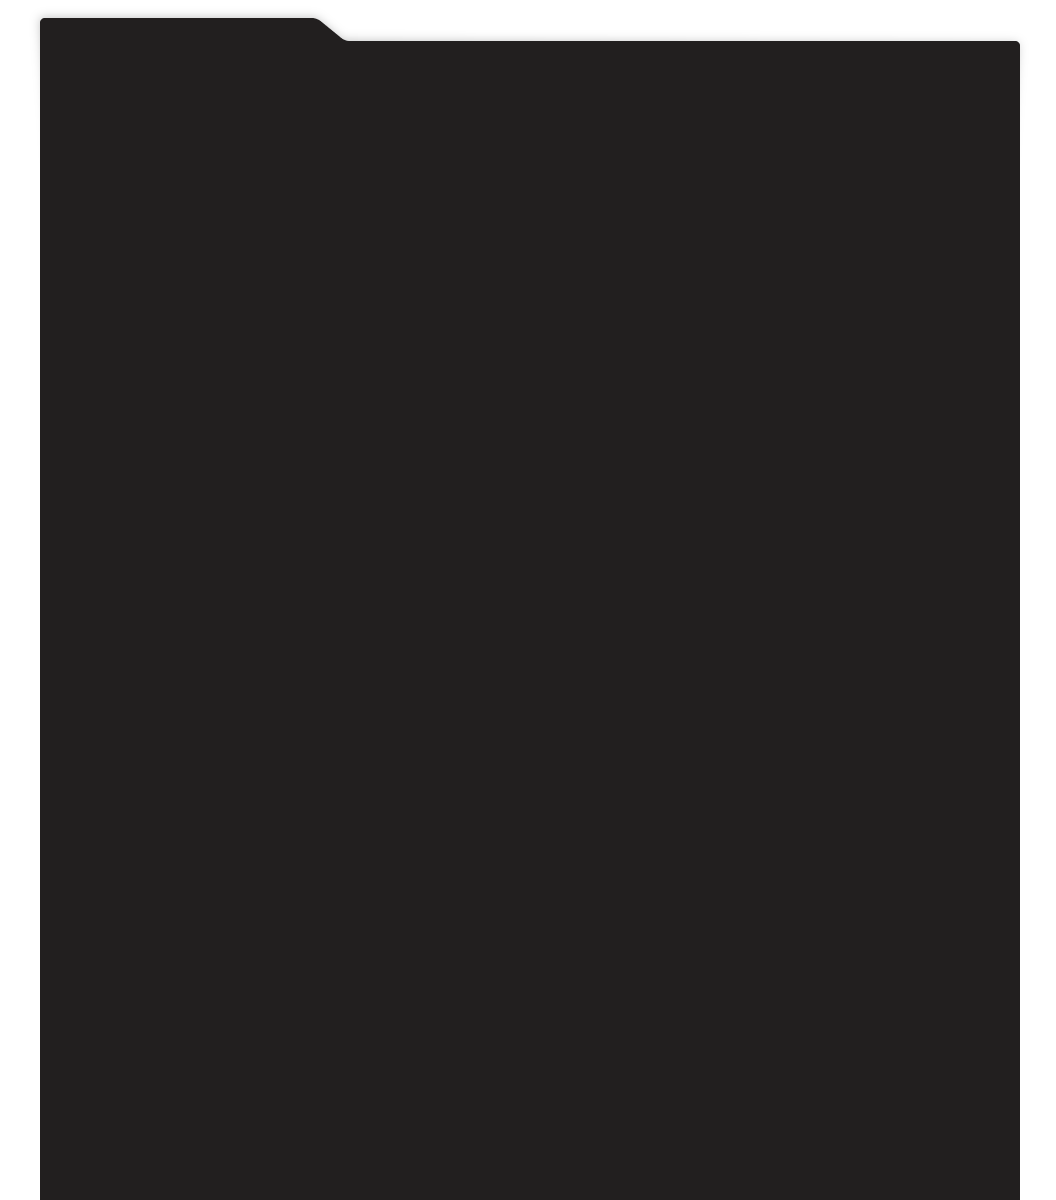
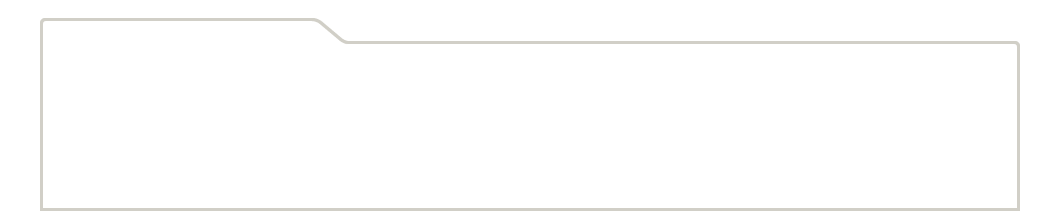
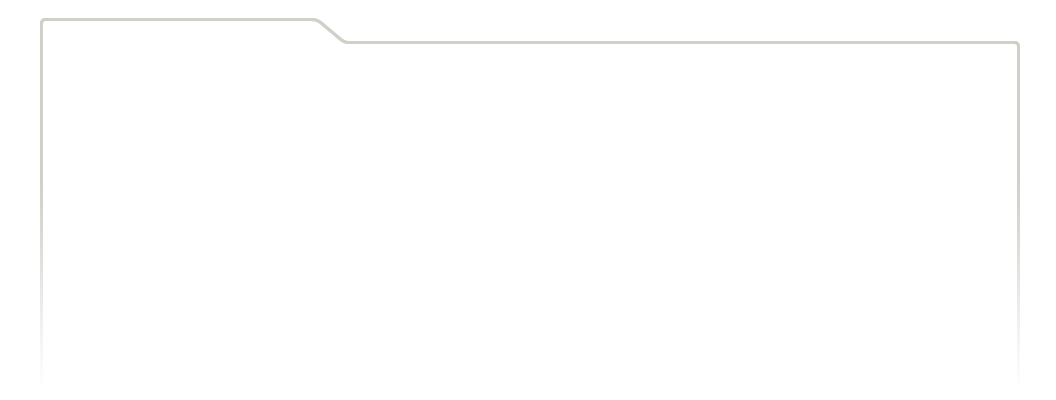
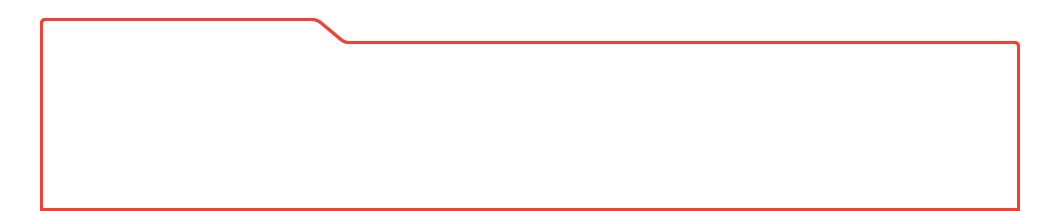
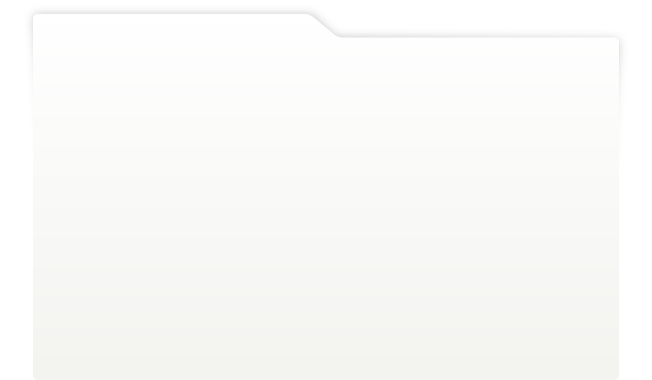
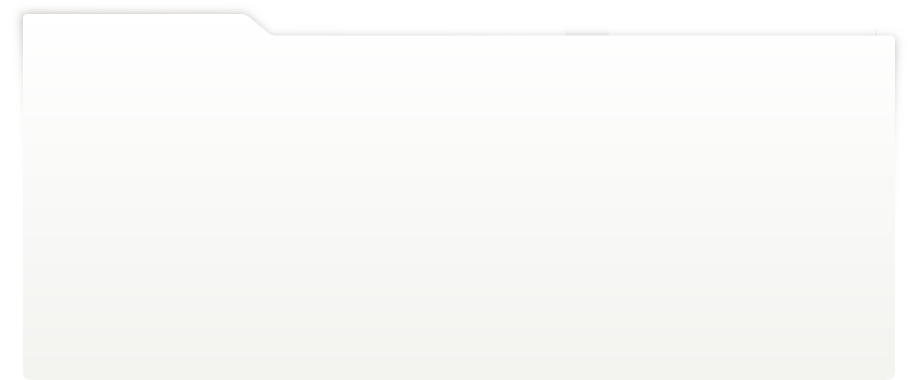
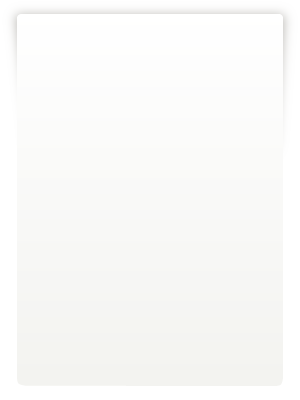
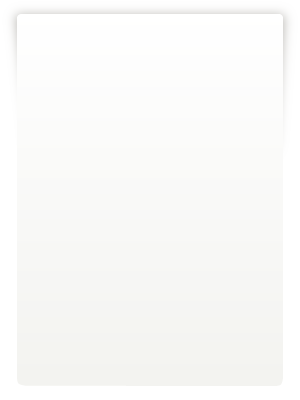
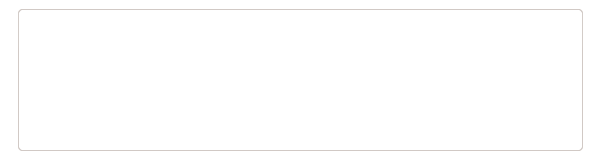
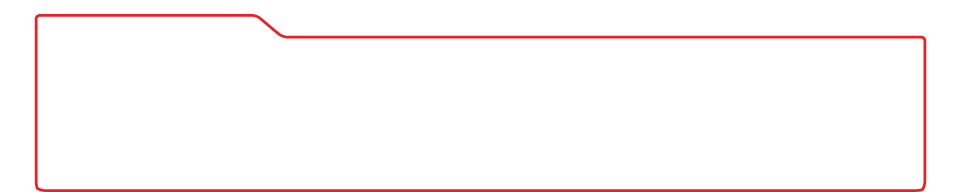
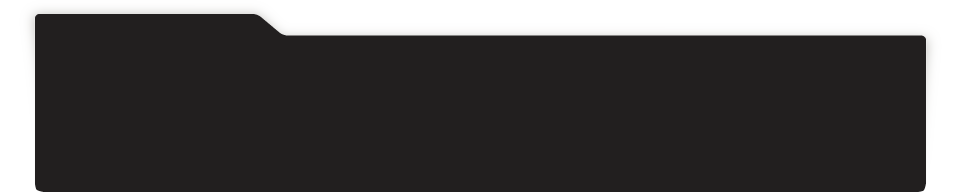
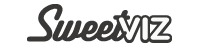
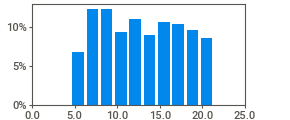
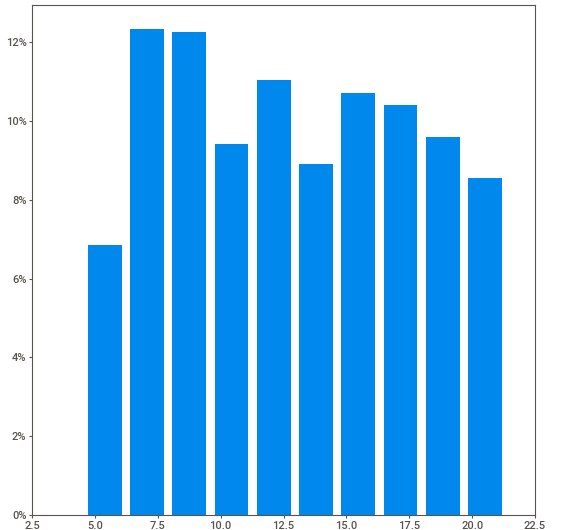
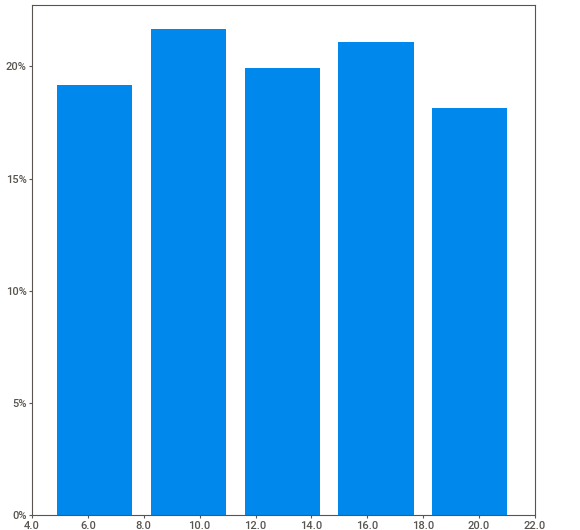
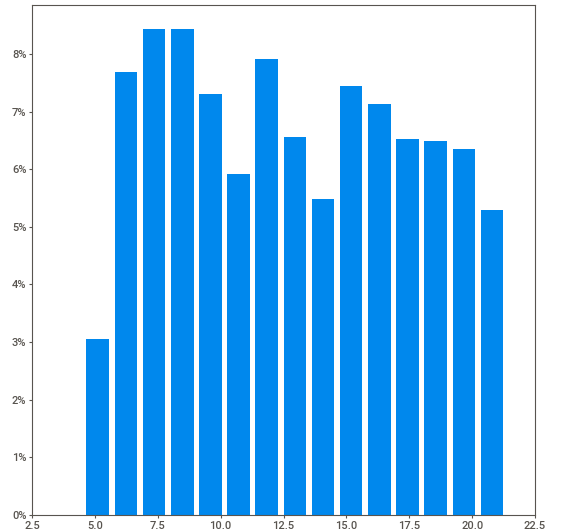
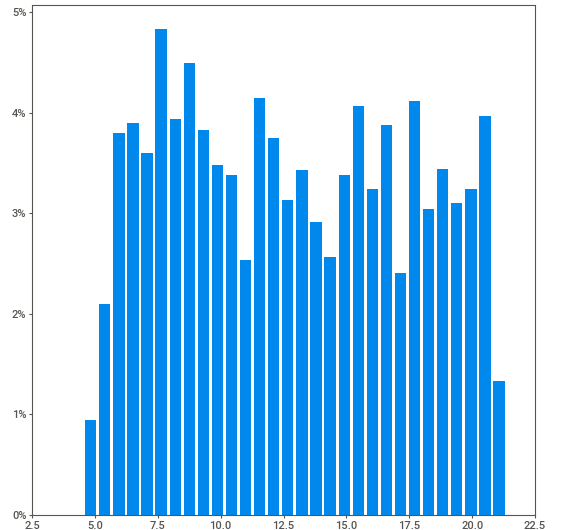
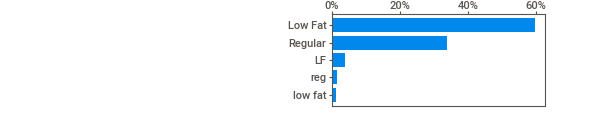
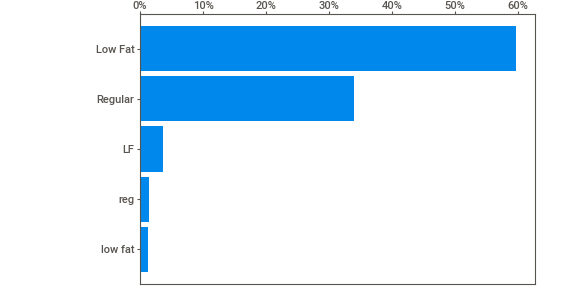
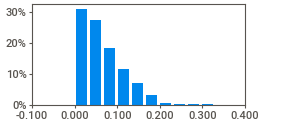
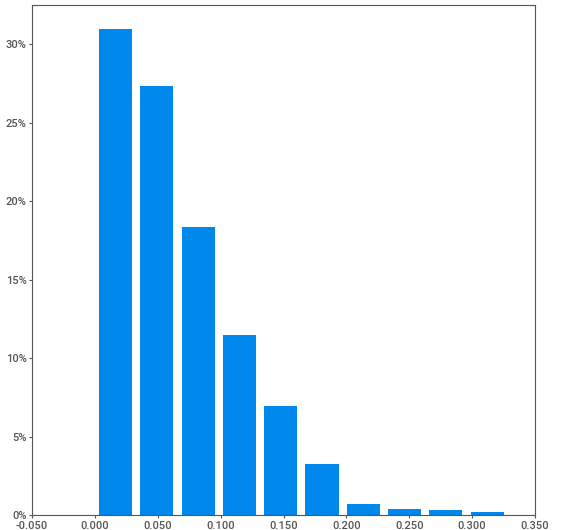
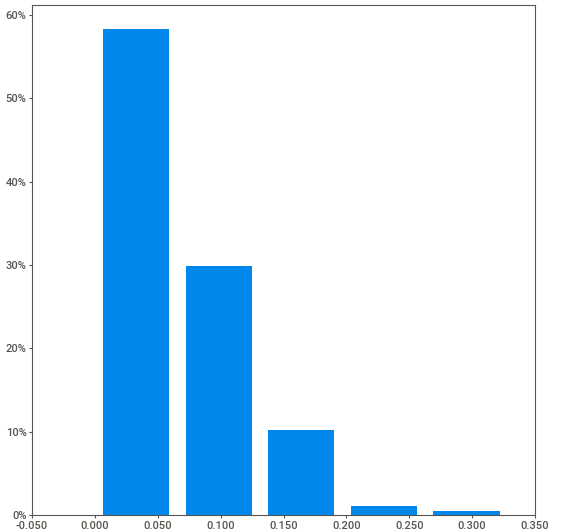
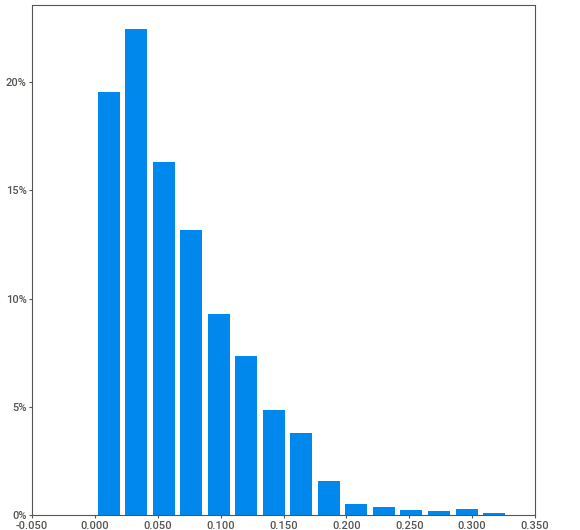
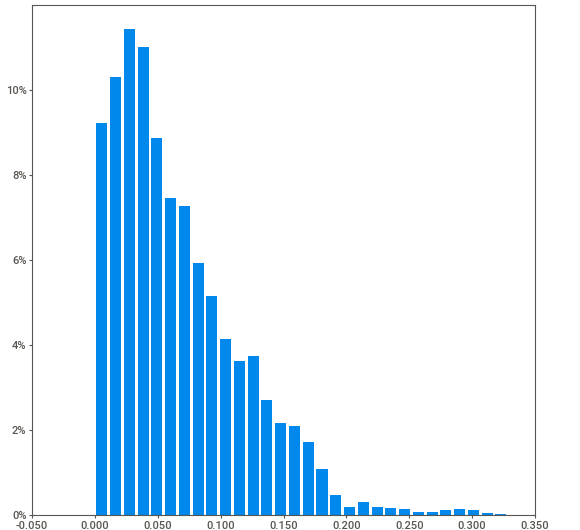
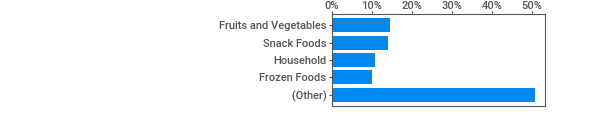
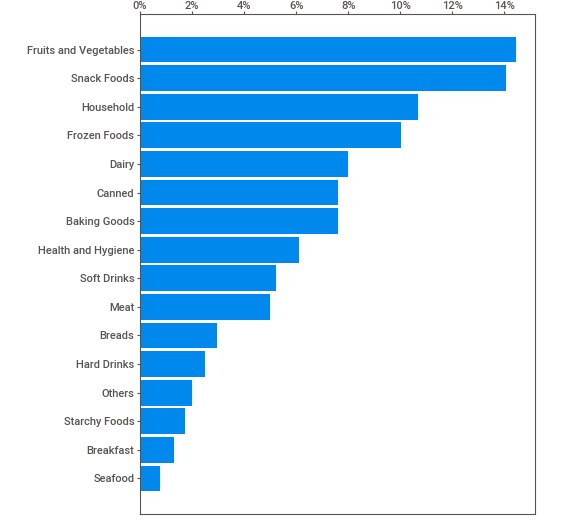
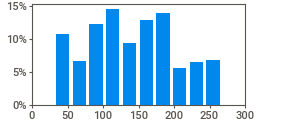
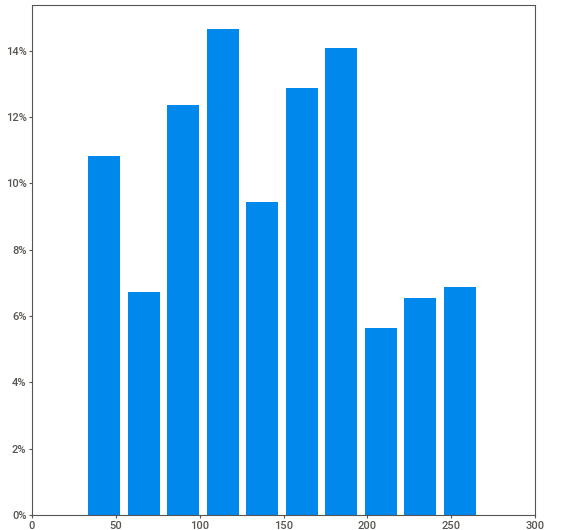
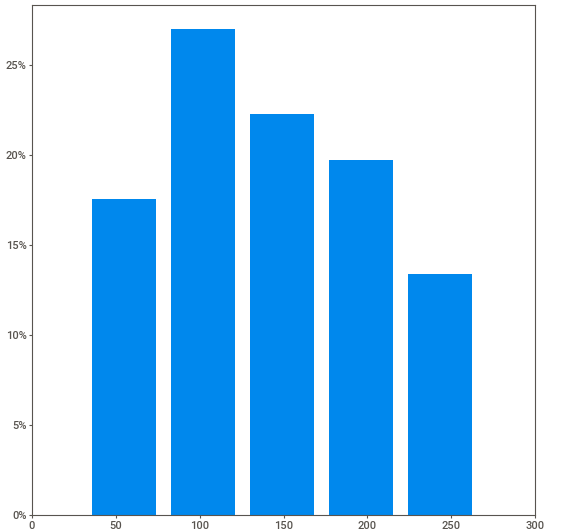
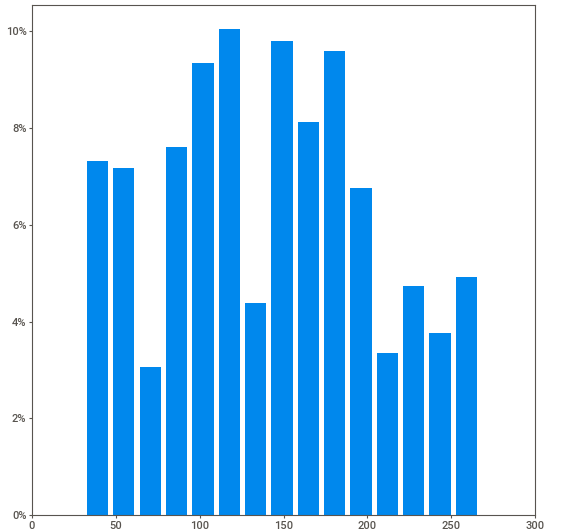
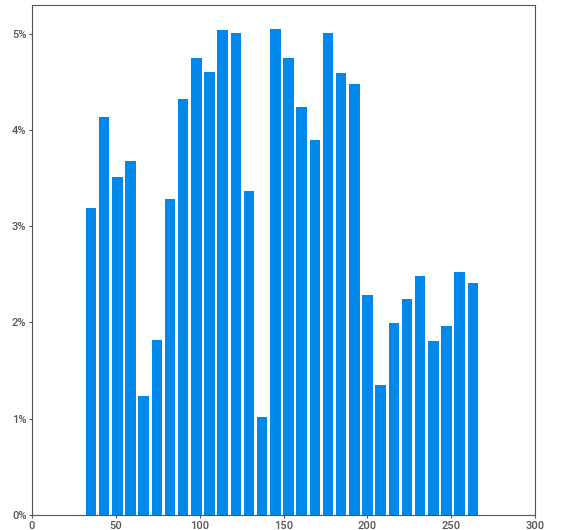
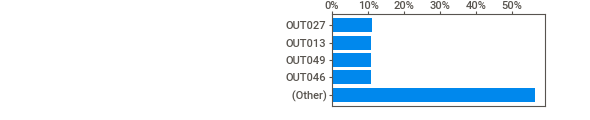
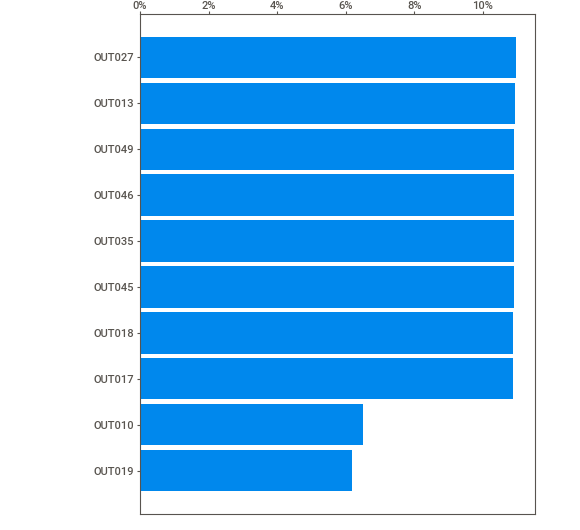
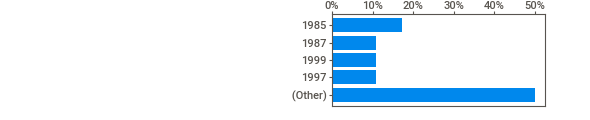
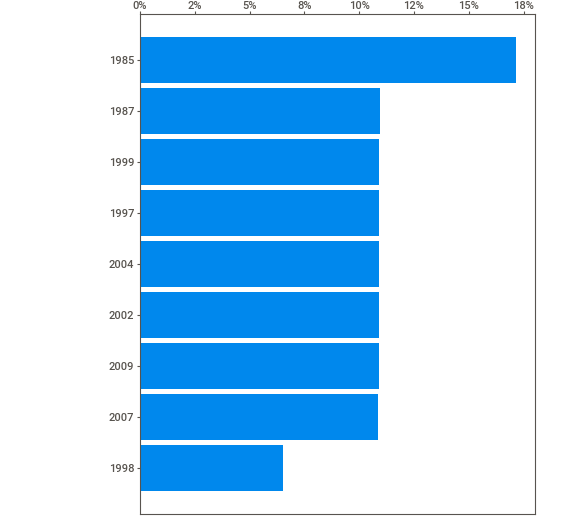
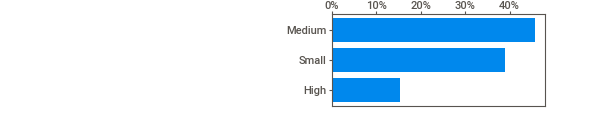
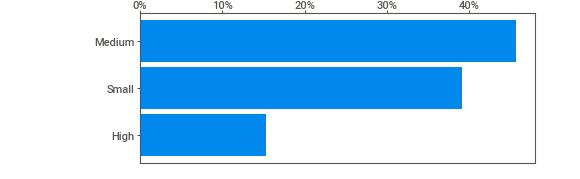
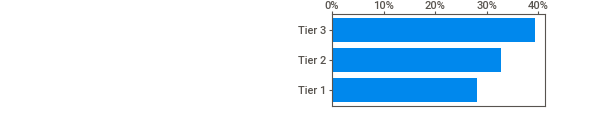
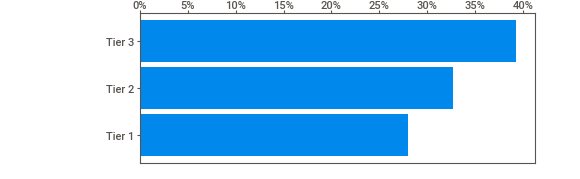
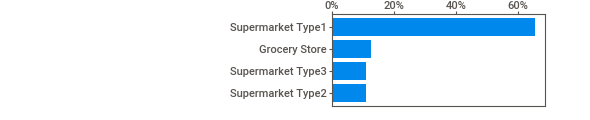
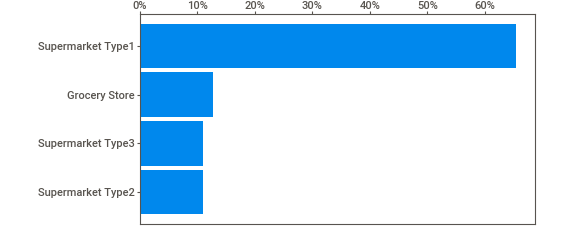
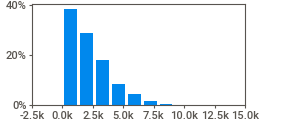
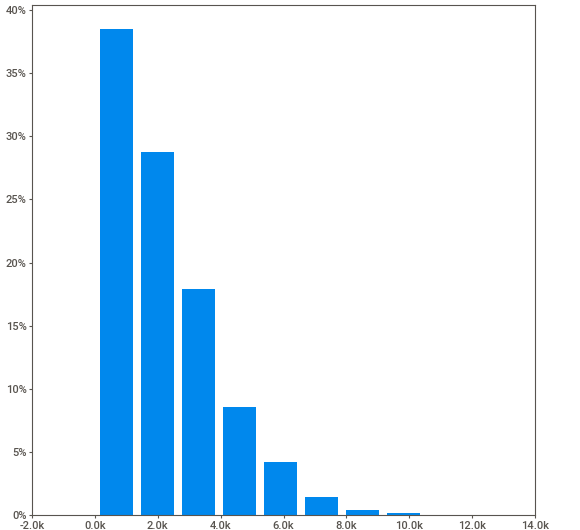
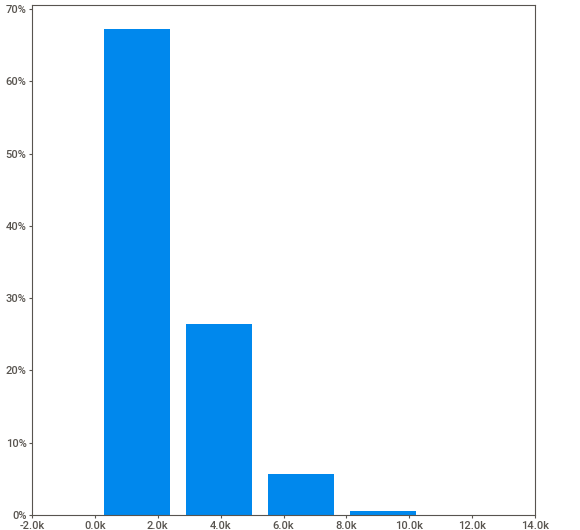
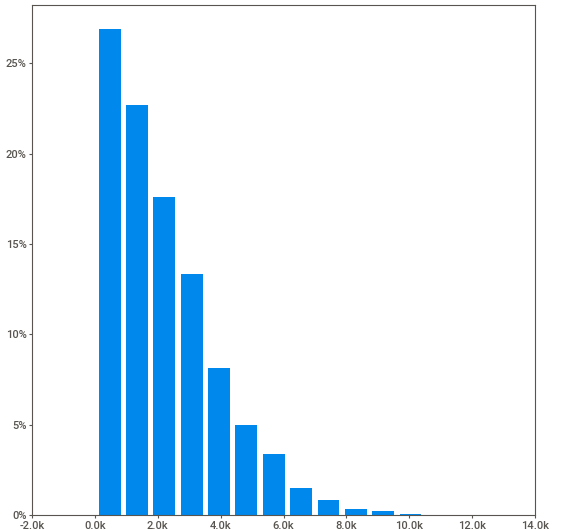
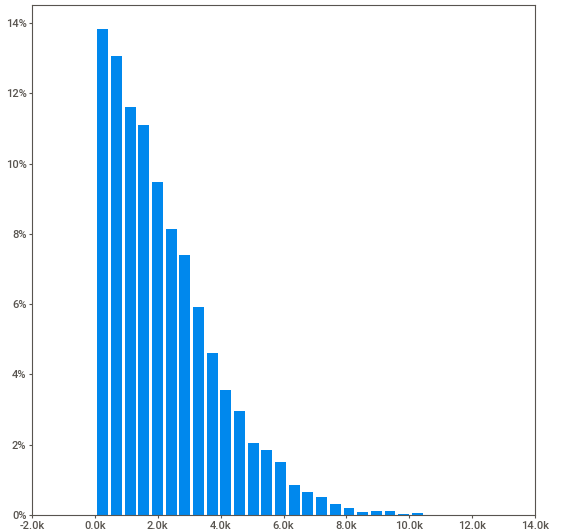
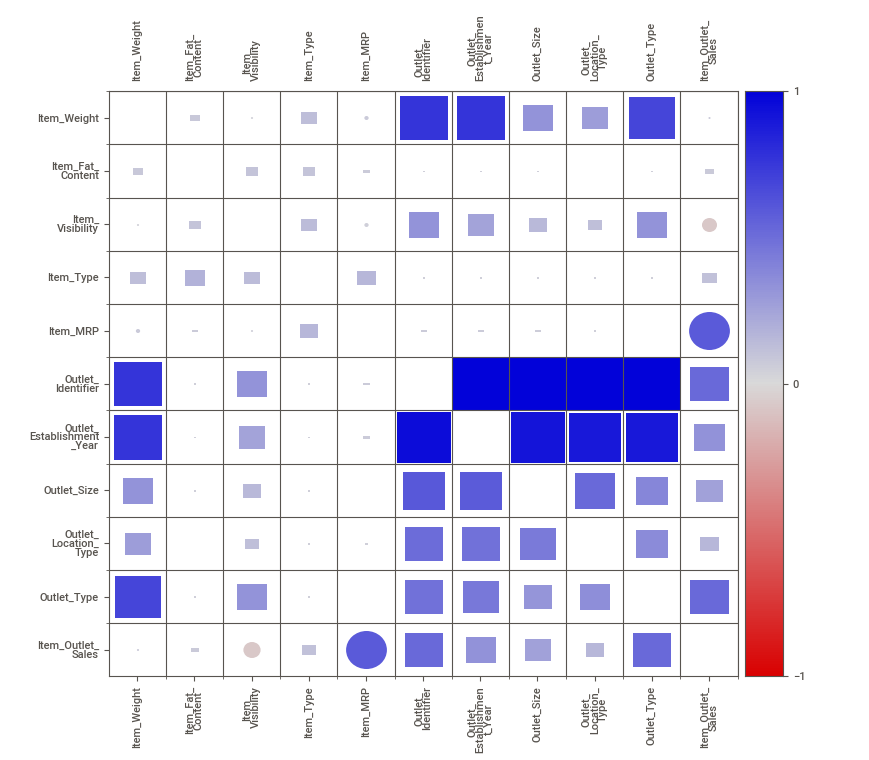
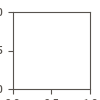

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import sweetviz as sv

# Assuming your dataset is in a DataFrame called 'Sales_prediction'
my_report = sv.analyze(data)

# Show the report in a Jupyter notebook
my_report.show_notebook()

# Alternatively, you can save the report to an HTML file and open it in a web browser
my_report.show_html('sweetviz_report.html')

In [ ]:
#import pandas as pd

#Step 2: Check for Missing Values

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


# Use Groupby to Perform mean on Item Weight (Numerical)

In [ ]:
#Step 3: Handling Missing Values, Since its a numerical feature

data['Item_Weight'] = data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

# Use Groupby to Perform mode on Outlet_size ( Categorical)

In [ ]:
#Step 4: Handling Missing Values, Since its a categorical feature

data['Outlet_Size'] = data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# Check for missing values after imputation
missing_values_after_imputation = data.isnull().sum()

# Display the count of missing values for each column after imputation
print("Missing values count for each column after imputation:")
print(missing_values_after_imputation)


Missing values count for each column after imputation:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


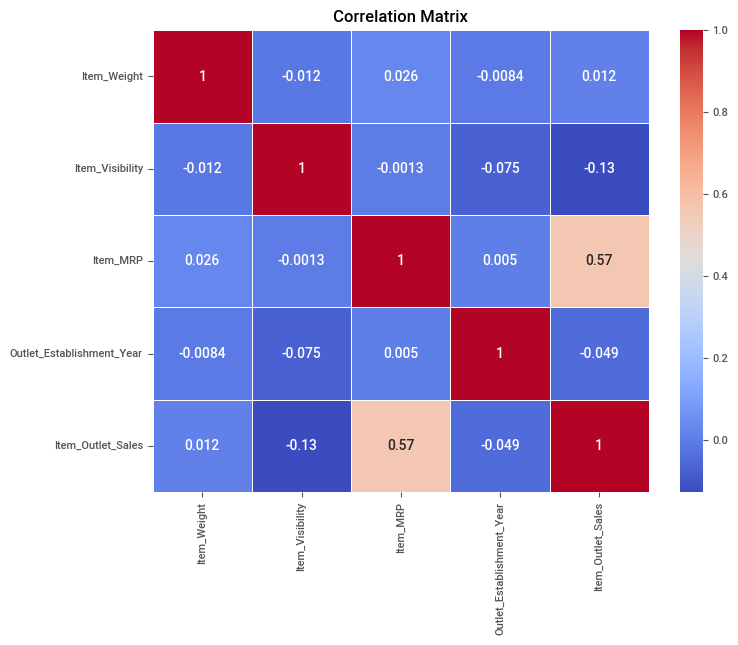

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=["float64", "int64"])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")

# Show the plot
plt.show()

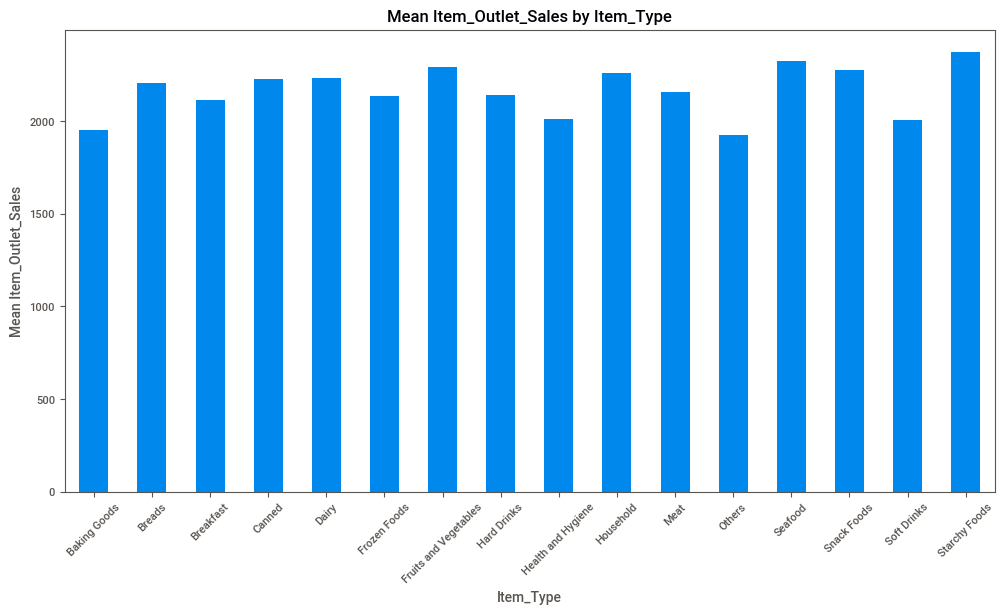

In [ ]:
#Perform EDA related to Objective 1
# Perform exploratory data analysis (EDA)
# Here, we will demonstrate an example by analyzing the relationship between 'Item_Type' and 'Item_Outlet_Sales'.

import matplotlib.pyplot as plt

# Group by 'Item_Type' and calculate the mean 'Item_Outlet_Sales'
mean_sales_by_item_type = data.groupby('Item_Type')['Item_Outlet_Sales'].mean()

# Plot the mean 'Item_Outlet_Sales' for each 'Item_Type'
plt.figure(figsize=(12, 6))
mean_sales_by_item_type.plot(kind='bar')
plt.xlabel('Item_Type')
plt.ylabel('Mean Item_Outlet_Sales')
plt.title('Mean Item_Outlet_Sales by Item_Type')
plt.xticks(rotation=45)
plt.show()

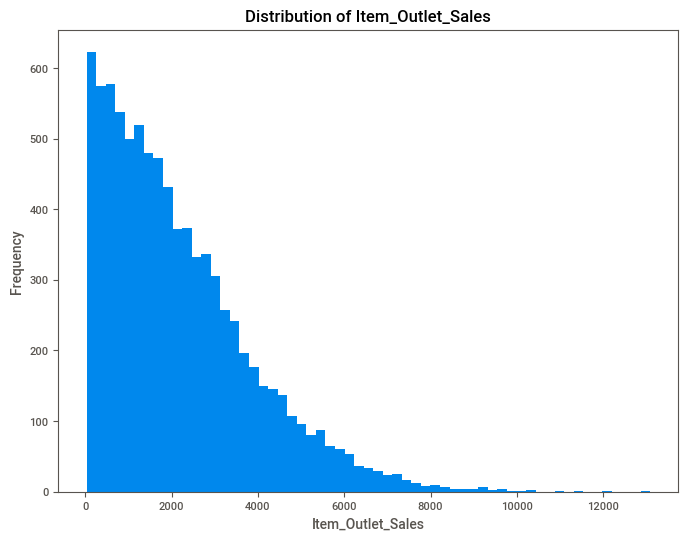

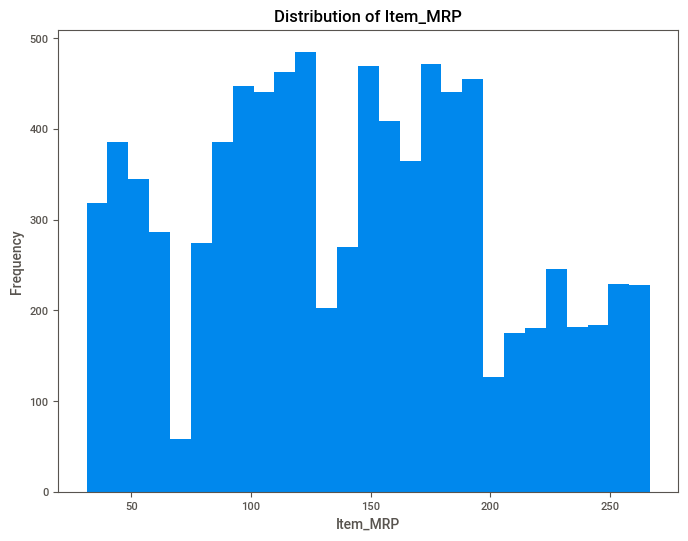

In [ ]:
#Distribution Analysis

# Histogram of Item_Outlet_Sales
plt.figure(figsize=(8, 6))
plt.hist(data['Item_Outlet_Sales'], bins='auto')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Item_Outlet_Sales')
plt.show()

# Histogram for other numerical features
# For example, 'Item_MRP'
plt.figure(figsize=(8, 6))
plt.hist(data['Item_MRP'], bins='auto')
plt.xlabel('Item_MRP')
plt.ylabel('Frequency')
plt.title('Distribution of Item_MRP')
plt.show()

In [ ]:
# Cross-tabulation between 'Outlet_Location_Type' and 'Item_Type' with 'Item_Outlet_Sales'

cross_tab = pd.crosstab(index=data['Outlet_Location_Type'], columns=data['Item_Type'],
                        values=data['Item_Outlet_Sales'], aggfunc='mean')

display(cross_tab)

Item_Type             Baking Goods       Breads    Breakfast       Canned  \
Outlet_Location_Type                                                        
Tier 1                 1766.342208  2049.382087  1532.631248  1852.895069   
Tier 2                 2052.633001  2275.347721  2417.394963  2457.680736   
Tier 3                 2006.533613  2247.993804  2319.232924  2282.335768   

Item_Type                   Dairy  Frozen Foods  Fruits and Vegetables  \
Outlet_Location_Type                                                     
Tier 1                1809.322867   1897.476736            1970.086395   
Tier 2                2456.416209   2257.544049            2382.370900   
Tier 3                2380.265379   2206.455092            2430.594179   

Item_Type             Hard Drinks  Health and Hygiene    Household  \
Outlet_Location_Type                                                 
Tier 1                1884.684652         1862.165406  1969.979693   
Tier 2                2245.114589         2093.888859  2414.984811   
Tier 3                2224.207940         2039.980376  2330.118917   

Item_Type                    Meat       Others      Seafood  Snack Foods  \
Outlet_Location_Type                                                       
Tier 1                1725.347624  1675.628371  2077.821632  1948.236451   
Tier 2                2284.982989  2223.106200  2696.338682  2381.754219   
Tier 3                2371.327574  1902.965548  2176.963365  2423.638001   

Item_Type             Soft Drinks  Starchy Foods  
Outlet_Location_Type                              
Tier 1                1606.364563    2290.185550  
Tier 2                2160.130850    2645.022404  
Tier 3                2148.770423    2182.514969

The Visalization in the next cell compares the average sales of various item types across three tiers of outlet locations. The 'Item_Type' serves as the categorical axis, and separate bars represent the average sales for each location tier, giving a clear visual distinction between them. By rotating the labels on the x-axis, the chart ensures that the item types are easily readable. The addition of value labels atop each bar enhances the chart's informational value, allowing for quick assessment of numerical data. This visualization effectively communicates the relationship between item types and sales performance across different tiers, which could be instrumental for strategic planning in retail sales distribution.

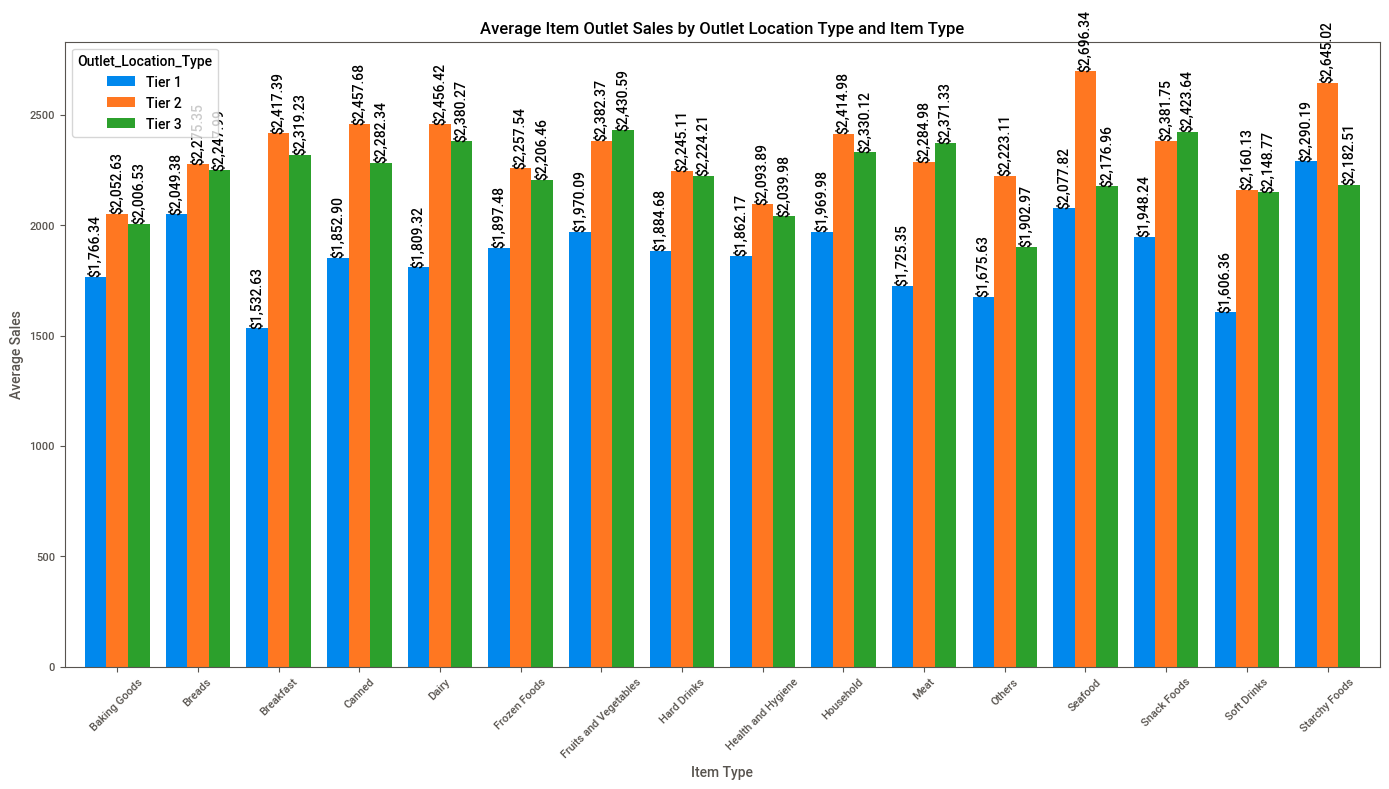

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the columns 'Item_Type', 'Outlet_Location_Type', and 'Item_Outlet_Sales'
# You would read in your dataset (e.g., from a CSV file) like this:
# data = pd.read_csv('path_to_your_dataset.csv')

# Now, let's calculate the average item outlet sales by item type and outlet location type
average_sales = data.pivot_table(values='Item_Outlet_Sales', index='Item_Type', columns='Outlet_Location_Type', aggfunc='mean')

# The resulting DataFrame 'average_sales' will have the average sales with item types as index and outlet location types as columns

# Plotting
ax = average_sales.plot(kind='bar', figsize=(14, 8), width=0.8)

# Title and labels
plt.title('Average Item Outlet Sales by Outlet Location Type and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)  # Rotate the item type labels for better readability

# Adding value labels on top of the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In the visualization in the cell below, We caluclated the market share of each 'Outlet_Type' within the retail business through the aggregation of 'Item_Outlet_Sales'. By grouping the sales data by 'Outlet_Type', we quantify the total revenue generated by each category of outlet.

#Grocery Store: 368,034.27: This indicates that the total sales for items sold in grocery stores amounted to $368,034.27.


#Supermarket Type1: 12,917,342.26: This shows that the total sales for items sold in supermarkets of Type 1 were significantly higher, amounting to $12,917,342.26, suggesting that this type of outlet is likely the main channel for sales in this dataset.

#Supermarket Type2: 1,851,822.83: This indicates that the total sales for items sold in supermarkets of Type 2 were $1,851,822.83. This is less than the sales in Supermarket Type1, which may imply that Type 2 supermarkets are either fewer in number, smaller in size, or less popular among customers.

#Supermarket Type3: 3,453,926.05: This denotes that the total sales for items sold in supermarkets of Type 3 were $3,453,926.05. While more than Type 2, it's still significantly less than Type 1, which could be due to various factors such as the number of outlets, location, size, customer preference, or other operational factors.

From these figures, it is clear that Supermarket Type1 is the largest contributor to sales among the outlet types listed. Grocery stores contribute the least, which could be due to a variety of reasons, such as smaller size, lower customer traffic, or limited product range. Supermarket Types 2 and 3 have moderate sales figures, indicating their respective shares in the market relative to the other types of outlets. This data could be valuable for making informed business decisions regarding sales strategies, marketing, and expansion.

Total Item Outlet Sales by Outlet Type:
Grocery Store: $368,034.27
Supermarket Type1: $12,917,342.26
Supermarket Type2: $1,851,822.83
Supermarket Type3: $3,453,926.05


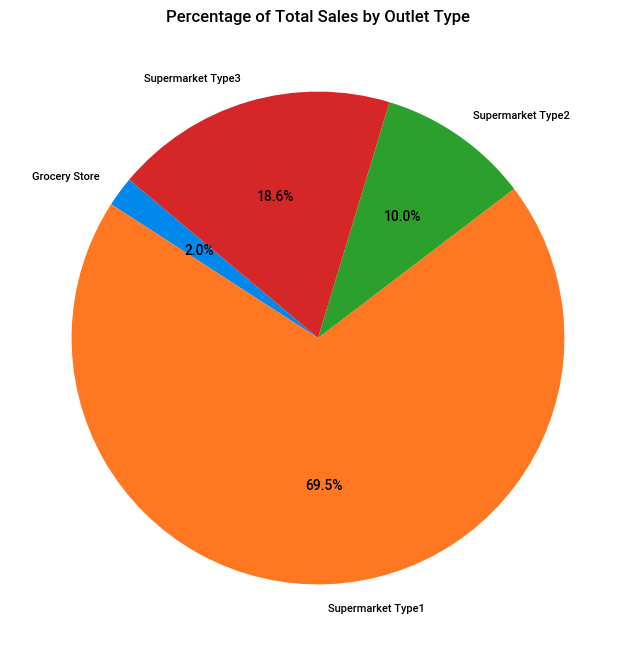

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the columns 'Outlet_Type' and 'Item_Outlet_Sales'

# Sum 'Item_Outlet_Sales' for each 'Outlet_Type'
grouped_sales = data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

# Convert the grouped data to a dictionary
outlet_sales = grouped_sales.to_dict()

# Print the sales sums in text format with the dollar sign
print("Total Item Outlet Sales by Outlet Type:")
for outlet_type, sales in outlet_sales.items():
    print(f"{outlet_type}: ${sales:,.2f}")

# Create a pie chart with the grouped data
plt.figure(figsize=(8, 8))
plt.pie(grouped_sales, labels=grouped_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Sales by Outlet Type')
plt.show()

Supermarket Type3 has the highest overall sales. This is followed by Supermarket Type1, Supermarket Type2, and Grocery Store.
Sales tend to increase as MRP increases. This is true for all of the outlet types, but it is especially noticeable for Supermarket Type3.
There is a lot of variation in sales within each MRP range. This suggests that factors other than MRP, such as the specific item being sold or the location of the outlet, also play a role in sales.

C:\Users\Dell\AppData\Local\Temp\ipykernel_12556\557418849.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(values='Item_Outlet_Sales', index='Item_MRP_bins', columns='Outlet_Type', aggfunc=np.mean)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12556\557418849.py:12: FutureWarning: The provided callable <function mean at 0x000001D16DD7F7E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = data.pivot_table(values='Item_Outlet_Sales', index='Item_MRP_bins', columns='Outlet_Type', aggfunc=np.mean)


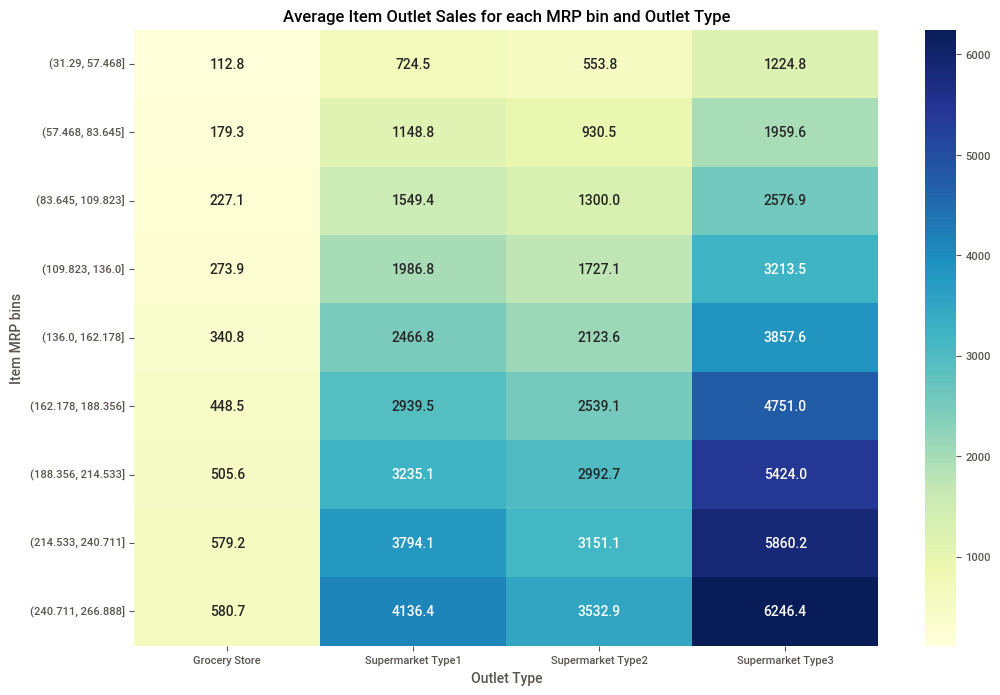


Cluster Map Interpretation:
- Each cell in the heatmap represents the average sales for a particular combination of 'Item MRP' range and 'Outlet Type'.
- The color indicates the level of sales, with darker colors representing higher average sales.
- This visualization helps to quickly identify which combinations of item prices and outlet types are associated with higher or lower sales.
- For example, if a particular color is consistently darker across a row, it suggests that items in that MRP range tend to sell better across all Outlet Types.
- On the other hand, if a column has darker cells, it indicates that a particular Outlet Type generally achieves higher sales, regardless of the MRP range.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'data' is preloaded with the relevant columns

# First, let's create discrete bins for 'Item_MRP' to categorize the prices
data['Item_MRP_bins'] = pd.cut(data['Item_MRP'], bins=np.linspace(data['Item_MRP'].min(), data['Item_MRP'].max(), num=10))

# Now, create a pivot table to summarize the average sales for each combination of 'Outlet_Type' and 'Item_MRP' bins
pivot_table = data.pivot_table(values='Item_Outlet_Sales', index='Item_MRP_bins', columns='Outlet_Type', aggfunc=np.mean)

# Use a heatmap to visualize the pivot table; this will show the average sales for each MRP bin across outlet types
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Item Outlet Sales for each MRP bin and Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item MRP bins')
plt.show()

# Textual interpretation as a print output
print("""
Cluster Map Interpretation:
- Each cell in the heatmap represents the average sales for a particular combination of 'Item MRP' range and 'Outlet Type'.
- The color indicates the level of sales, with darker colors representing higher average sales.
- This visualization helps to quickly identify which combinations of item prices and outlet types are associated with higher or lower sales.
- For example, if a particular color is consistently darker across a row, it suggests that items in that MRP range tend to sell better across all Outlet Types.
- On the other hand, if a column has darker cells, it indicates that a particular Outlet Type generally achieves higher sales, regardless of the MRP range.
""")

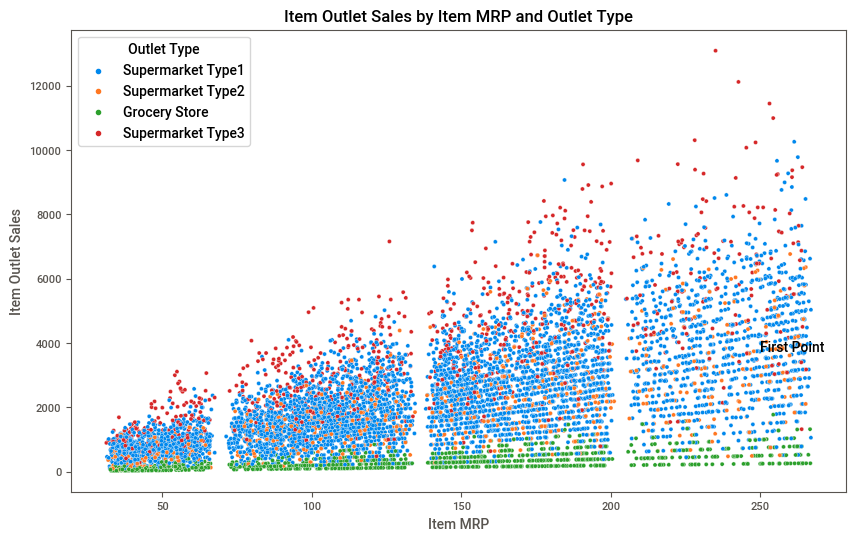

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', data=data)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Item Outlet Sales by Item MRP and Outlet Type')
plt.legend(title='Outlet Type')

# Example of annotating the first point in the dataset
first_point = data.iloc[0]  # Assuming you want to annotate the first point
plt.text(first_point['Item_MRP'], first_point['Item_Outlet_Sales'], 'First Point')

plt.show()


## FEATURE ENGINEERING

In [ ]:
import pandas as pd

# FEATURE ENGINEERING

# Outlet_Age
data['Outlet_Age'] = 2024 - data['Outlet_Establishment_Year']

# Item_Visibility_MeanRatio
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Type')
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility'] / visibility_avg.loc[x['Item_Type']], axis=1)

# Item_Type_Combined
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

# Item_Fat_Content_Corrected
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

# Broad_Category
food_types = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast']
data['Broad_Category'] = data['Item_Type'].apply(lambda x: 'Food' if x in food_types else 'Non-Food')

# Perishable
perishable = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Baking Goods', 'Snack Foods', 'Breakfast']
data['Perishable'] = data['Item_Type'].apply(lambda x: 1 if x in perishable else 0)

# Creating a dataframe for the modified dataset
modified_data = pd.DataFrame(data)

# Displaying the dataframe
display(modified_data.head(6))


# Save the DataFrame to a CSV file
modified_data.to_csv("modified_data_exported.csv", index=False)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   

         Outlet_Type  Item_Outlet_Sales       Item_MRP_bins  Outlet_Age  \
0  Supermarket Type1          3735.1380  (240.711, 266.888]          25   
1  Supermarket Type2           443.4228     (31.29, 57.468]          15   
2  Supermarket Type1          2097.2700    (136.0, 162.178]          25   
3      Grocery Store           732.3800  (162.178, 188.356]          26   
4  Supermarket Type1           994.7052     (31.29, 57.468]          37   
5  Supermarket Type2           556.6088     (31.29, 57.468]          15   

   Item_Visibility_MeanRatio Item_Type_Combined Broad_Category  Perishable  
0                   0.221565               Food           Food           1  
1                   0.301353             Drinks       Non-Food           0  
2                   0.269092               Food           Food           1  
3                   0.000000               Food           Food           1  
4                   0.000000     Non-Consumable       Non-Food           0  
5                   0.000000               Food           Food           1

# DEEP MACHINE LEARNING METHODOLOGY

## RESEARCH OBJECTIVE 2

                                             |          | [  0%]   00:00 -> (? left)


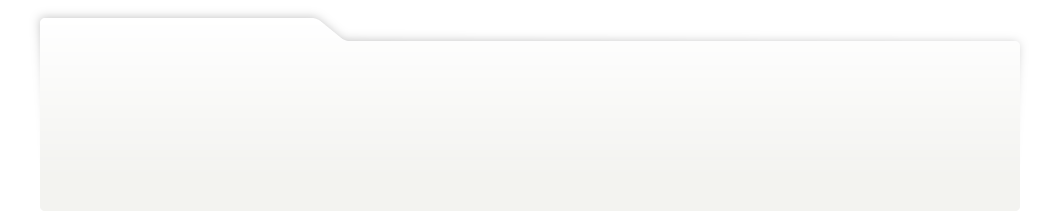
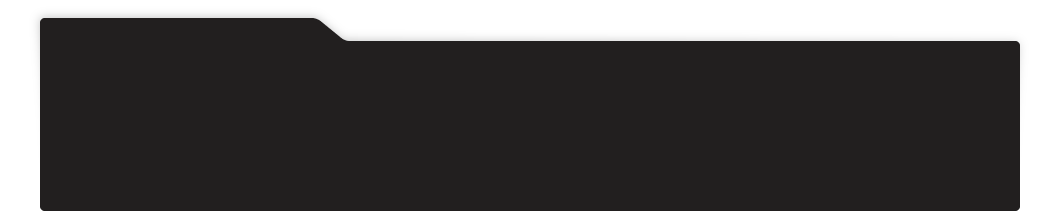
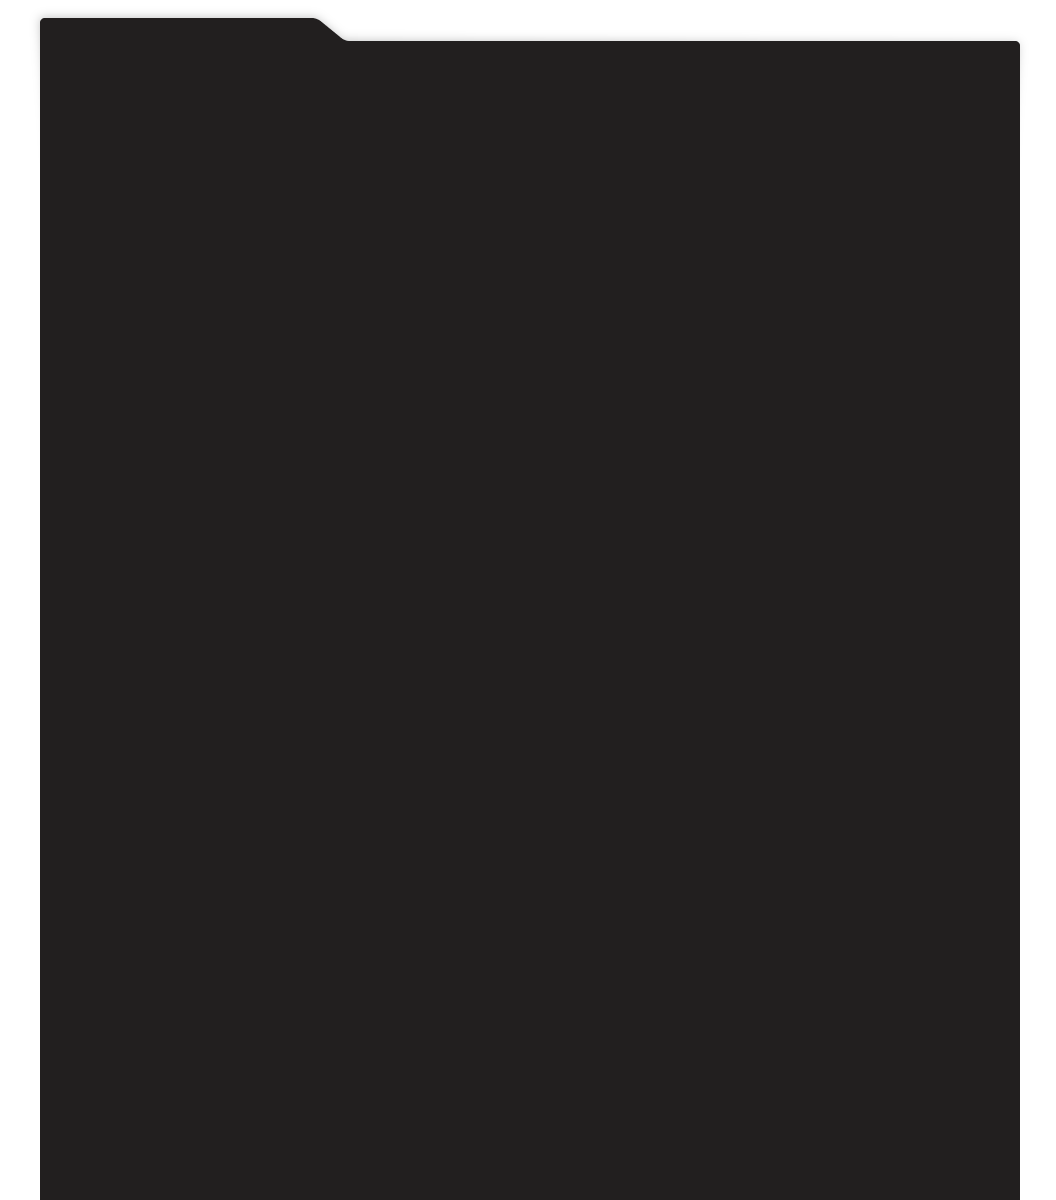
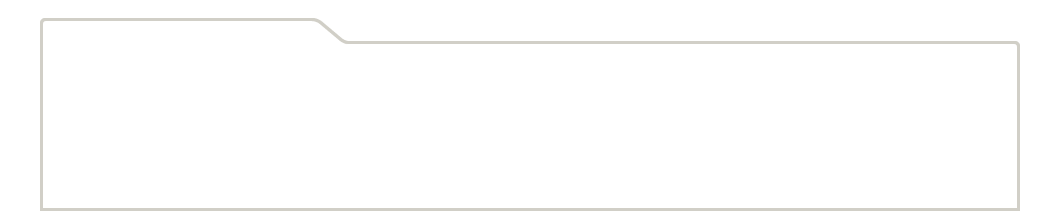
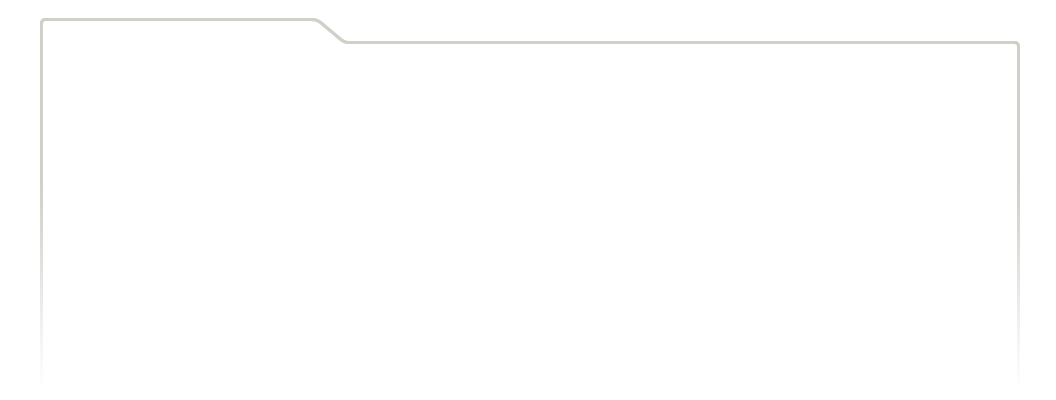
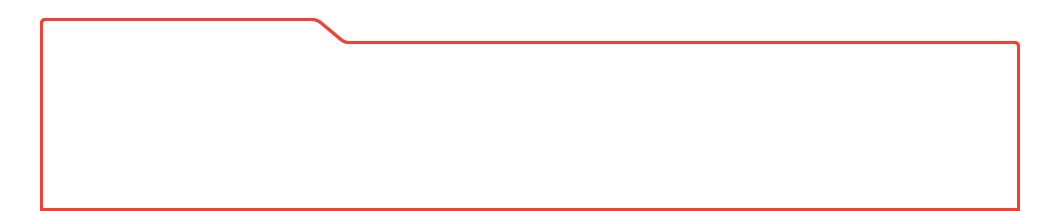
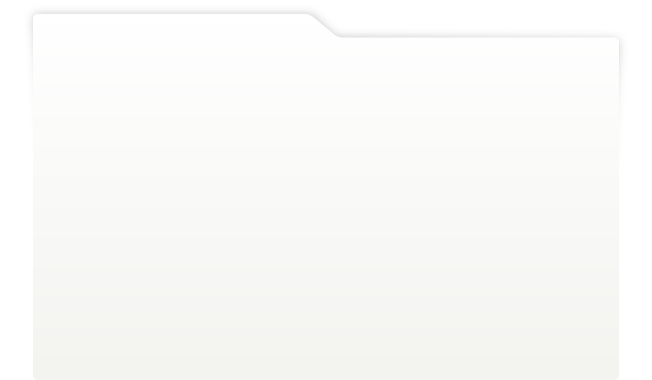
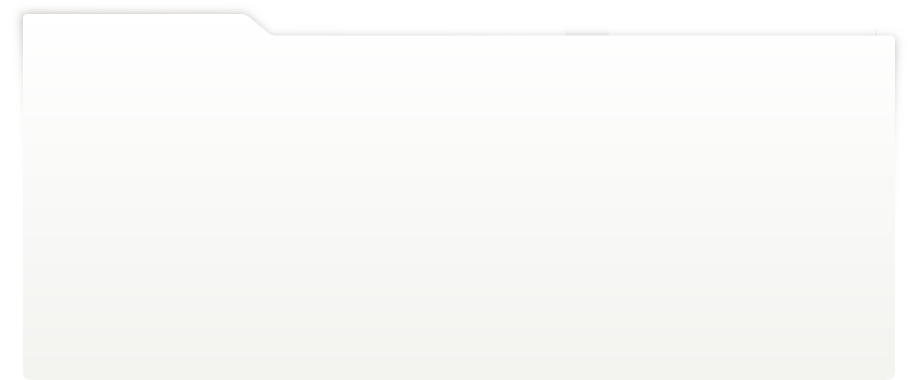
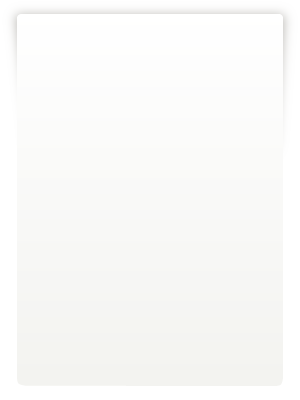
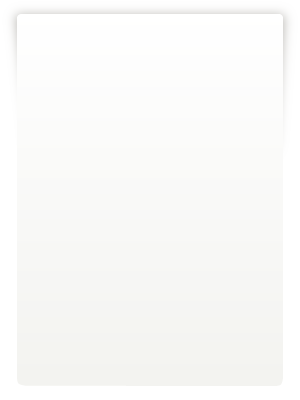
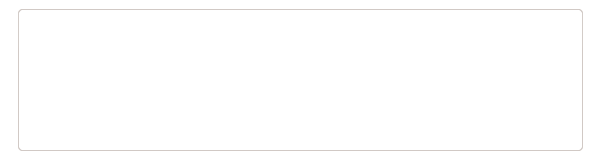
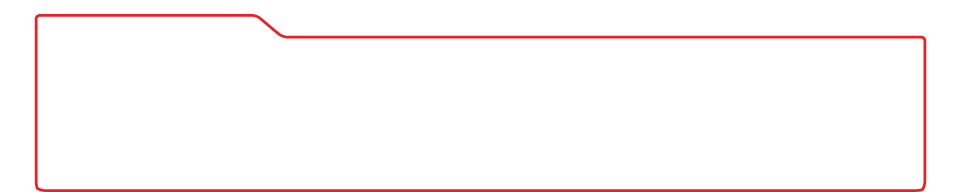
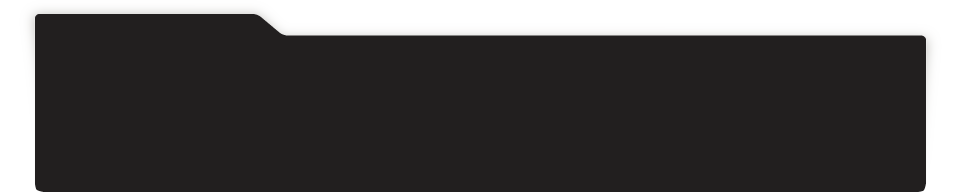
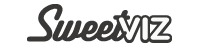
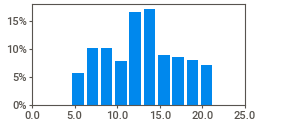
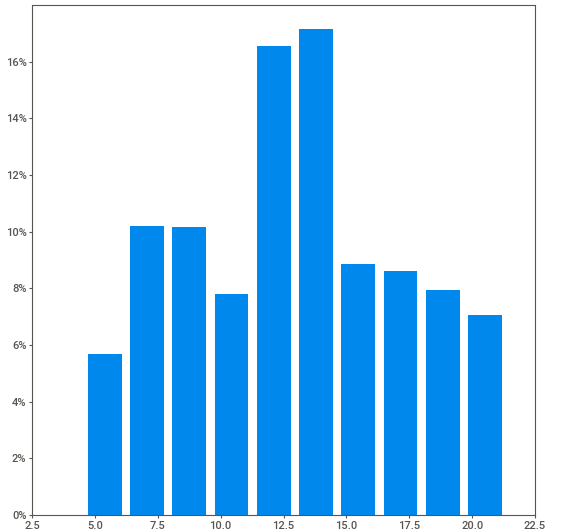
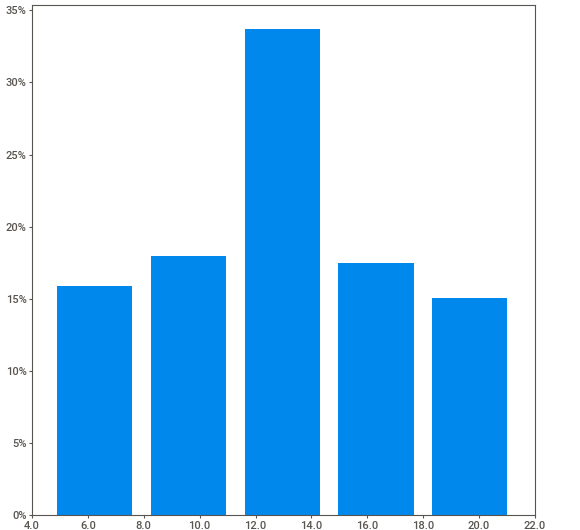
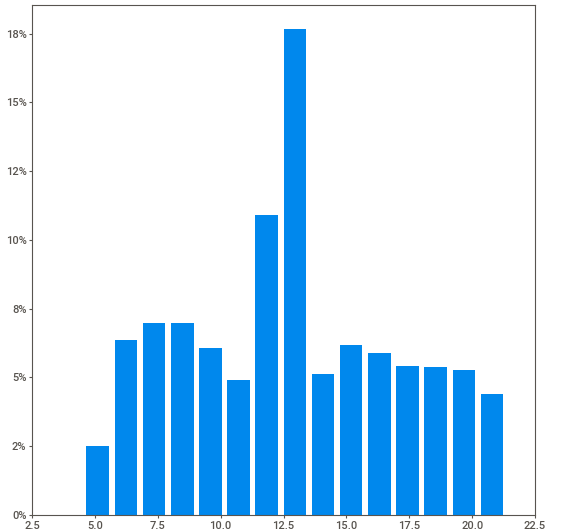
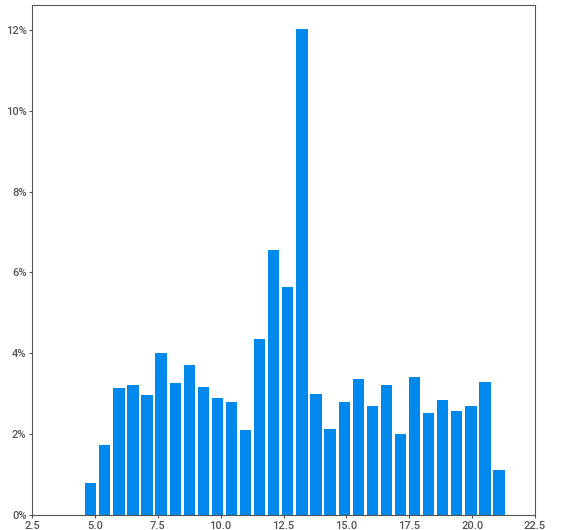
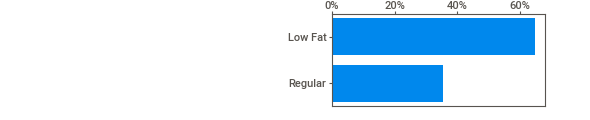
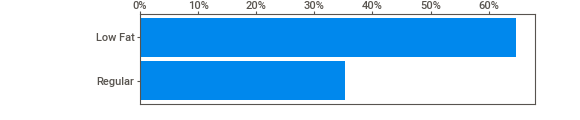
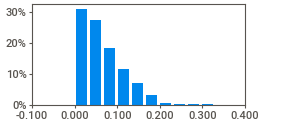
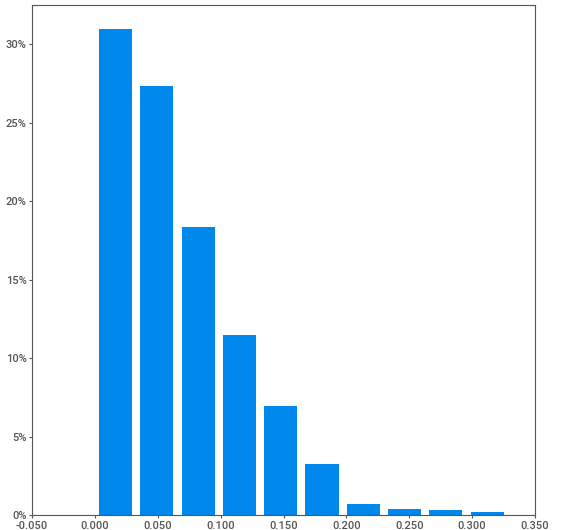
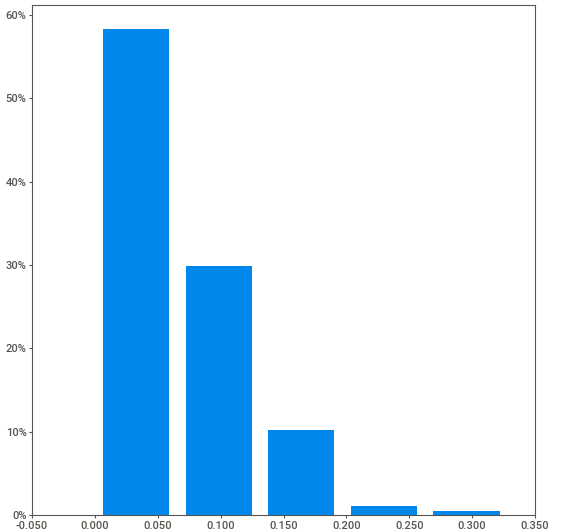
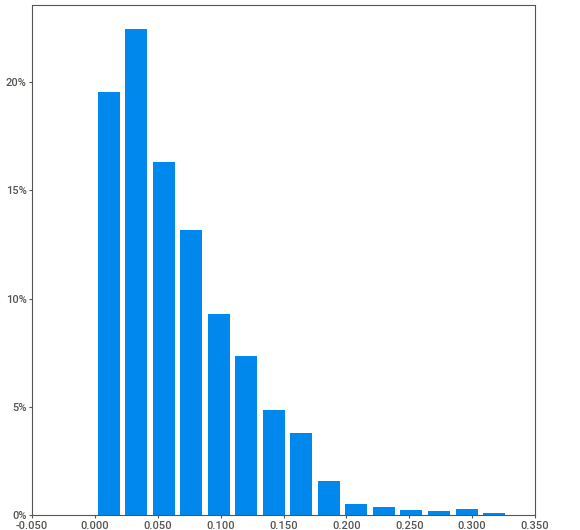
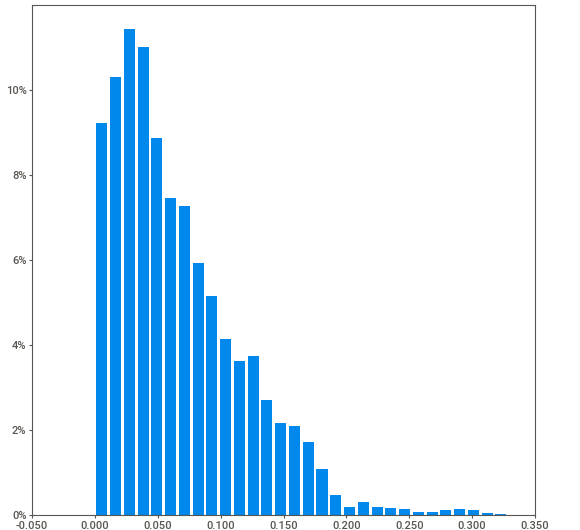
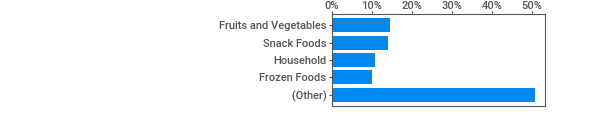
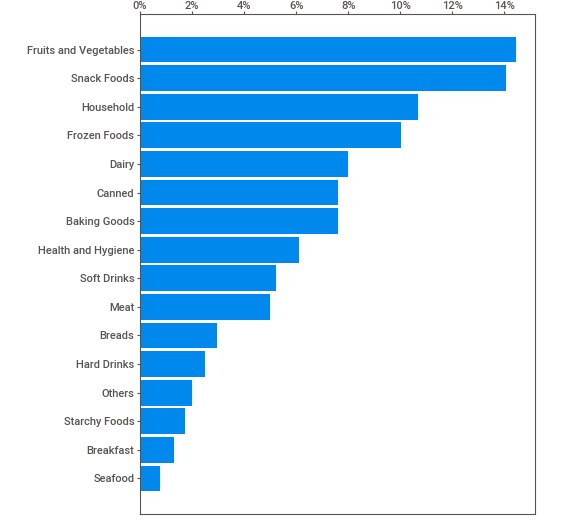
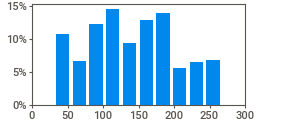
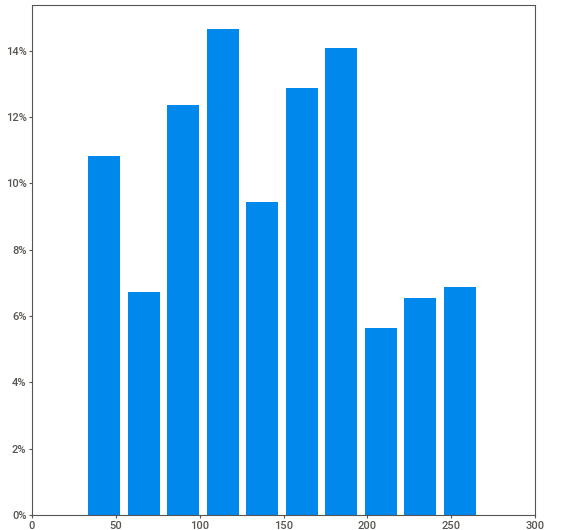
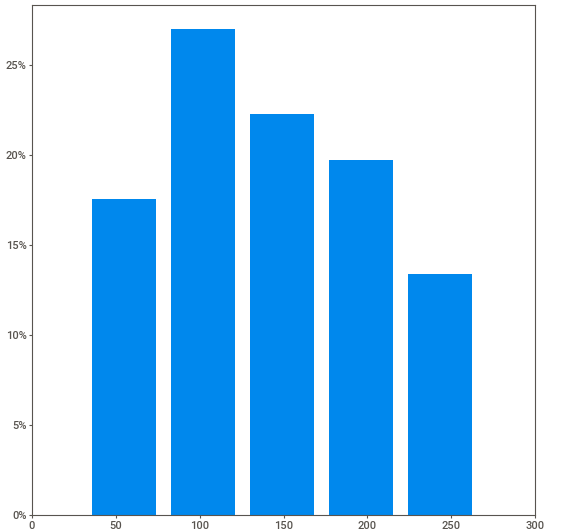
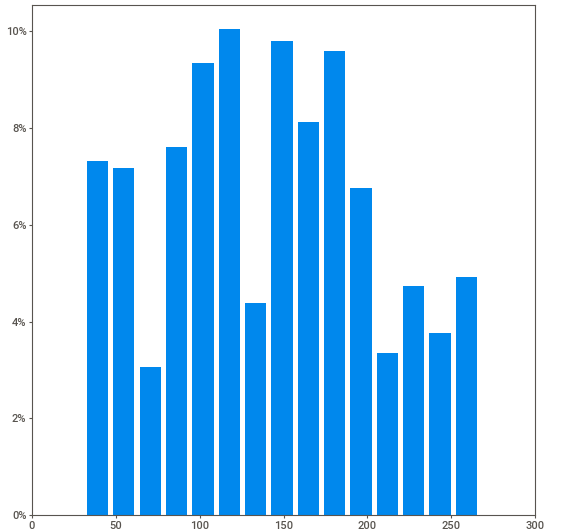
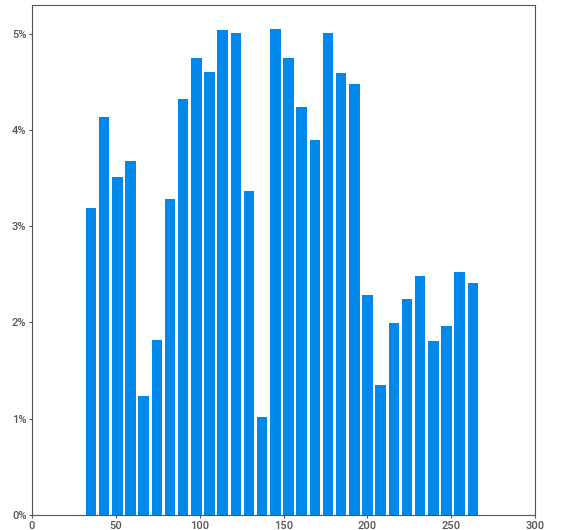
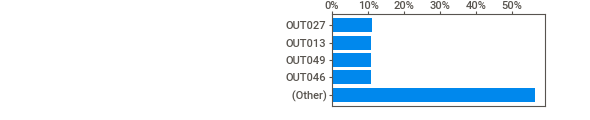
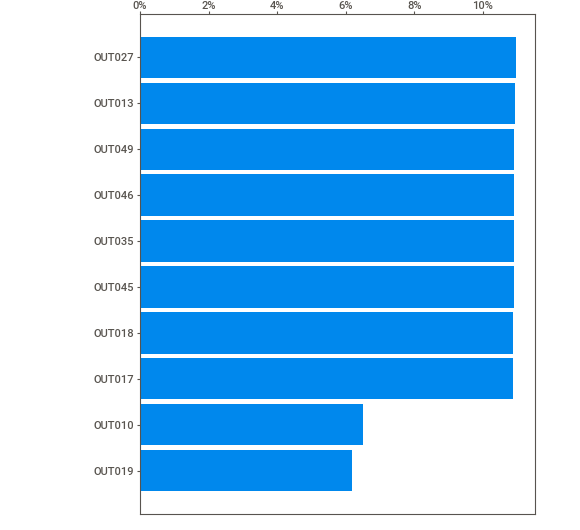
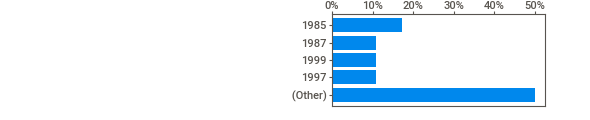
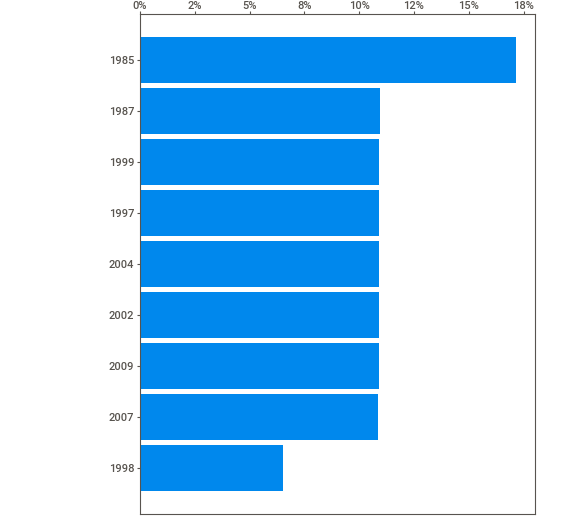
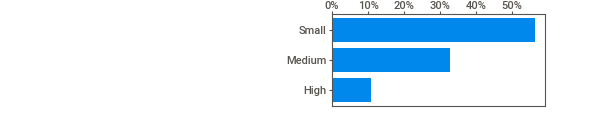
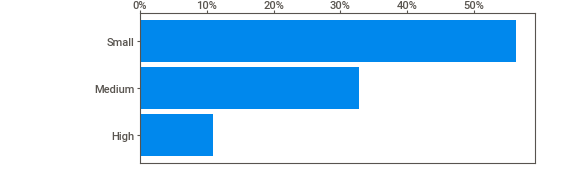
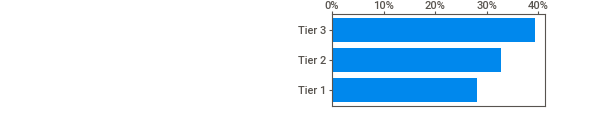
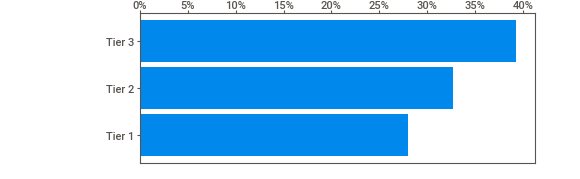
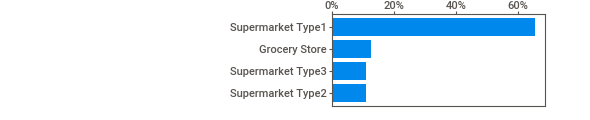
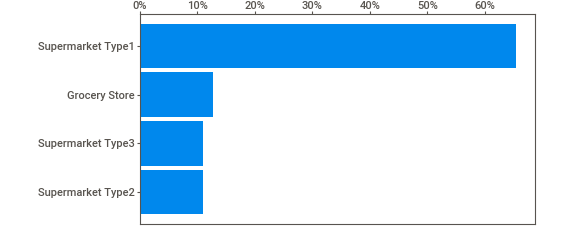
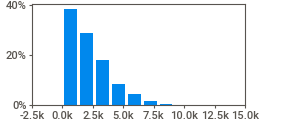
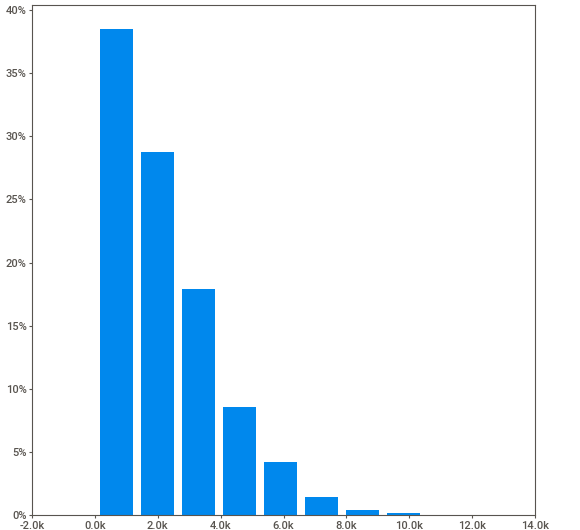
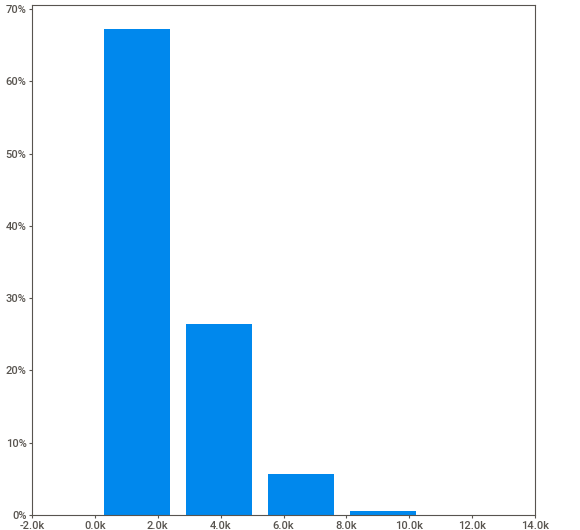
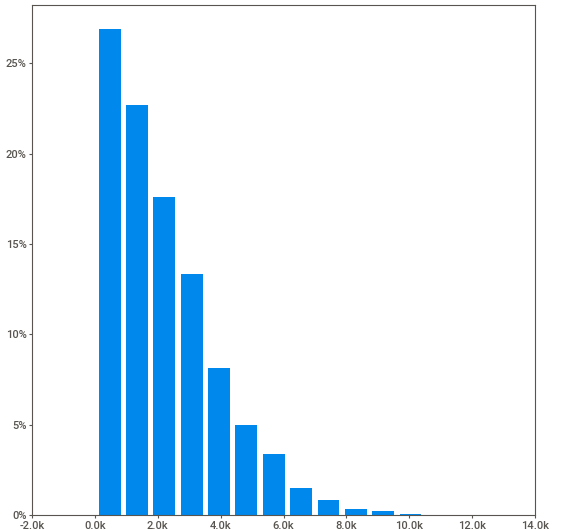
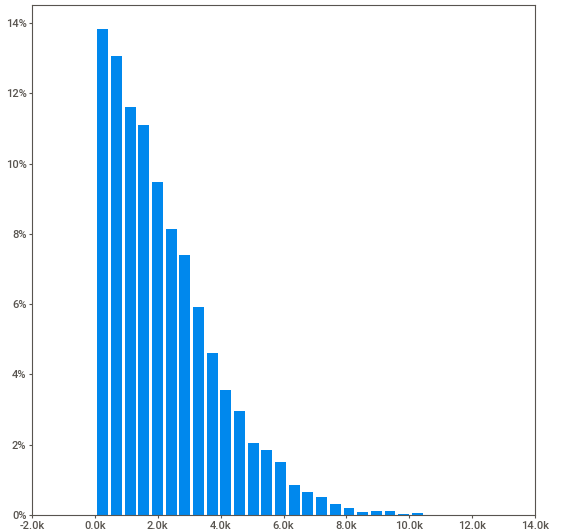
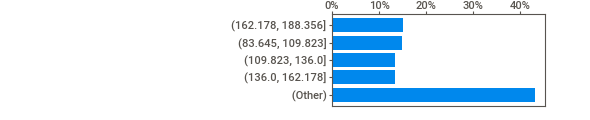
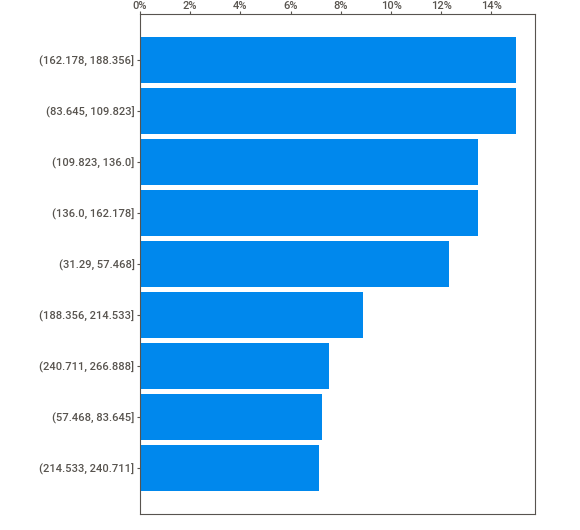
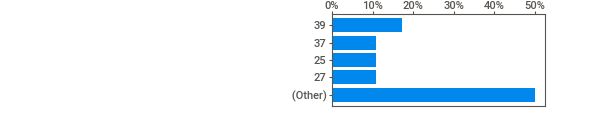
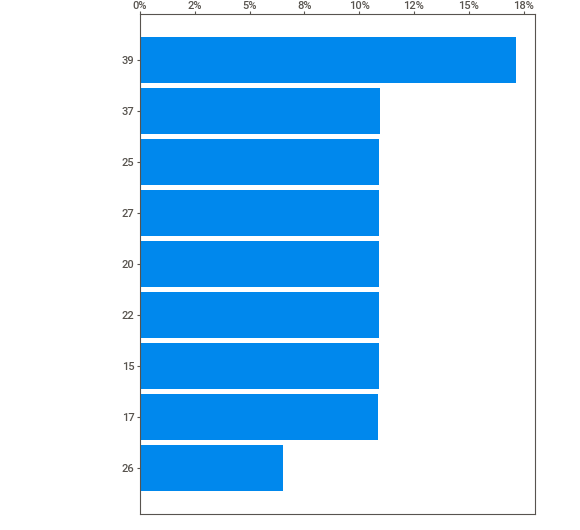
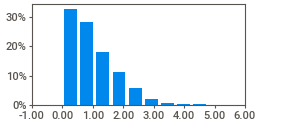
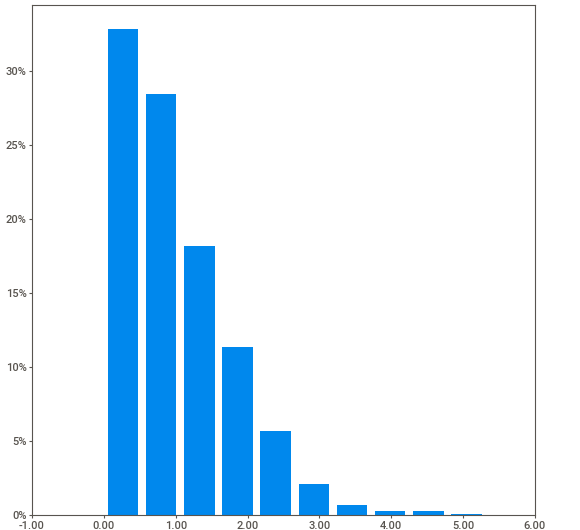
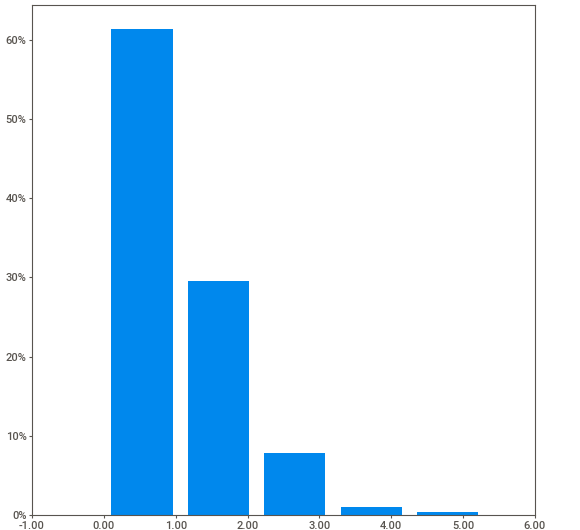
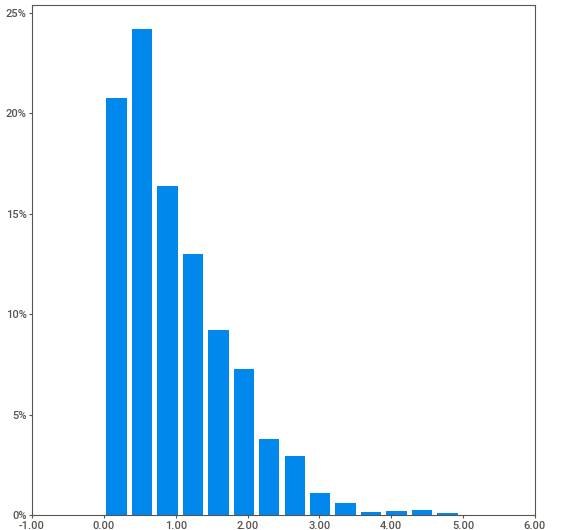
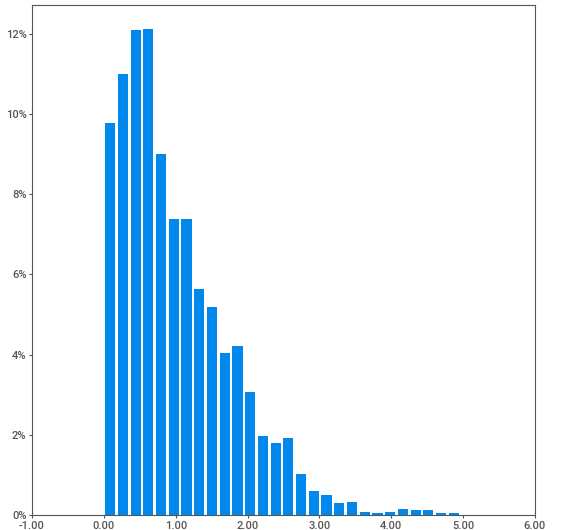
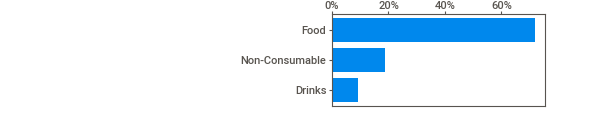
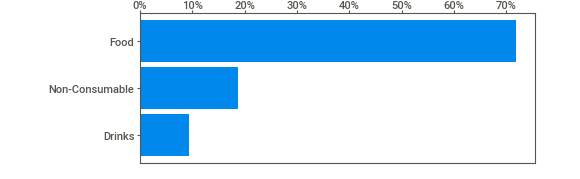
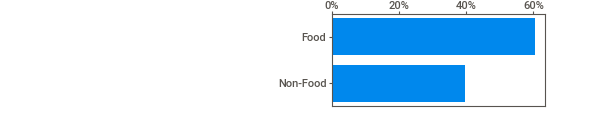
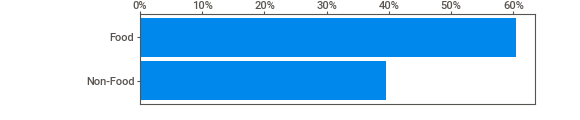
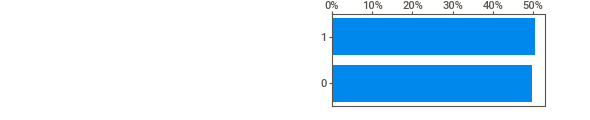
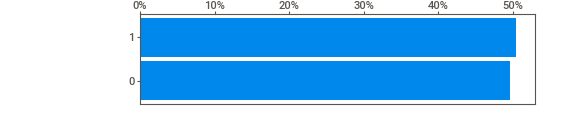
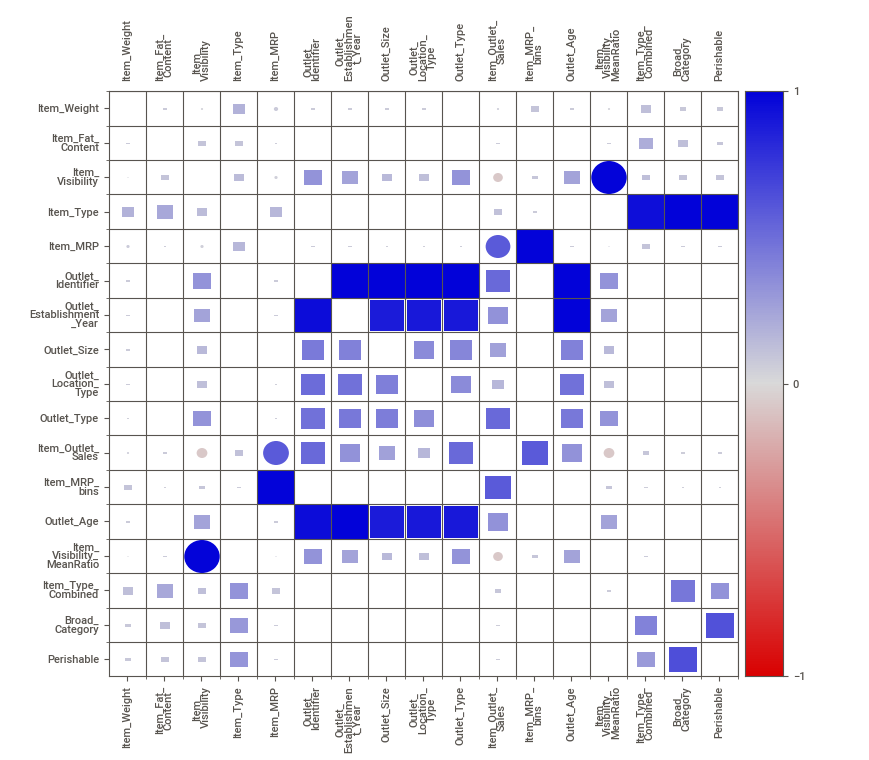
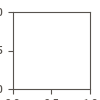

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import sweetviz as sv

# Assuming your dataset is in a DataFrame called 'modified_dataset'
my_report = sv.analyze(modified_data)

# Show the report in a Jupyter notebook
my_report.show_notebook()

# Alternatively, you can save the report to an HTML file and open it in a web browser
my_report.show_html('sweetviz_report.html')

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Read the dataset modified_data
try:
    modified_data = pd.read_csv("modified_dataset.csv")

    # Display the dataframe
    display(modified_data)

except FileNotFoundError:
    print("File not found. Please check the file path and name.")


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998       Small               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002       Small               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age  \
0     Supermarket Type1          3735.1380          25   
1     Supermarket Type2           443.4228          15   
2     Supermarket Type1          2097.2700          25   
3         Grocery Store           732.3800          26   
4     Supermarket Type1           994.7052          37   
...                 ...                ...         ...   
8518  Supermarket Type1          2778.3834          37   
8519  Supermarket Type1           549.2850          22   
8520  Supermarket Type1          1193.1136          20   
8521  Supermarket Type2          1845.5976          15   
8522  Supermarket Type1           765.6700          27   

      Item_Visibility_MeanRatio Item_Type_Combined Broad_Category  Perishable  
0                      0.221565               Food           Food           1  
1                      0.301353             Drinks       Non-Food           0  
2                      0.269092               Food           Food           1  
3                      0.000000               Food           Food           1  
4                      0.000000     Non-Consumable       Non-Food           0  
...                         ...                ...            ...         ...  
8518                   0.849412               Food           Food           1  
8519                   0.679238               Food           Food           1  
8520                   0.637248     Non-Consumable       Non-Food           0  
8521                   2.172329               Food           Food           1  
8522                   0.701527             Drink

# Data Cleaning and Preprocessing

In [ ]:
#CHECK FOR MISSING VALUES:

# Check for missing values
missing_values = modified_data.isnull().sum()

missing_values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
Item_Visibility_MeanRatio    0
Item_Type_Combined           0
Broad_Category               0
Perishable                   0
dtype: int64

# Checking for Outliers in the Numerical Column

Outliers in Item_Visibility are significantly higher values of product visibility in stores, suggesting these products have unusually high presence or prominence on the shelves. With over 90 identified outliers, ranging roughly from 0.22 to 0.33, these numbers significantly deviate from the typical range of visibility in the dataset. No outliers are present in Item_MRP, indicating that all maximum retail prices fall within a normal range. For Item_Outlet_Sales, the outliers are exceptionally high sales figures for certain items, with values extending beyond 7,000 up to over 13,000 units, which far exceed the typical sales range and may indicate exceptionally popular or bulk purchases.

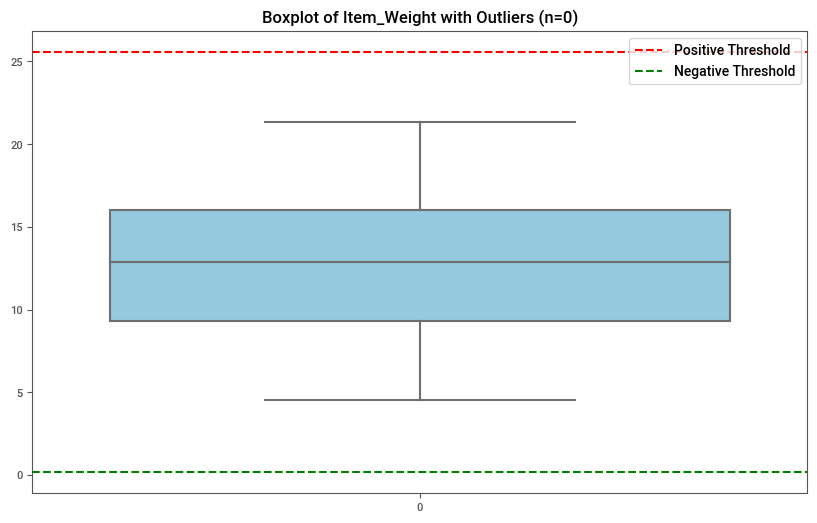

No outliers found in Item_Weight


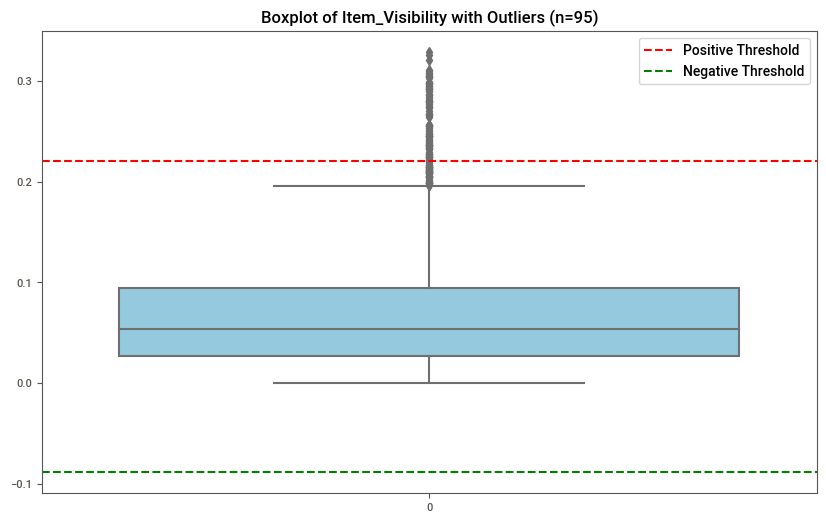

Outliers in Item_Visibility: [0.255394896, 0.293417759, 0.278974075, 0.291865402, 0.264124669, 0.228993134, 0.297883712, 0.233039817, 0.328390948, 0.247321039, 0.227189581, 0.223440258, 0.267352587, 0.25637539, 0.244102315, 0.255348289, 0.224837308, 0.22417463, 0.245542627, 0.236433601, 0.270300331, 0.32111501, 0.248301532, 0.274405193, 0.235354055, 0.241055611, 0.30374337, 0.23212188, 0.237651344, 0.222063351, 0.294939214, 0.284065879, 0.234733477, 0.309390255, 0.277459381, 0.253947823, 0.236616754, 0.228469522, 0.232072674, 0.304859104, 0.291826616, 0.242768664, 0.298205272, 0.325780807, 0.266234421, 0.255929096, 0.24749009, 0.27321283, 0.225476528, 0.308145448, 0.245483691, 0.267565911, 0.233356571, 0.293066133, 0.290430317, 0.252865979, 0.280164929, 0.304737387, 0.294948897, 0.28701714, 0.302478871, 0.286344848, 0.245407386, 0.251094747, 0.289522833, 0.226122963, 0.235859408, 0.246678647, 0.238366442, 0.223985293, 0.238831875, 0.296713665, 0.305305397, 0.291438755, 0.240268248, 0.2

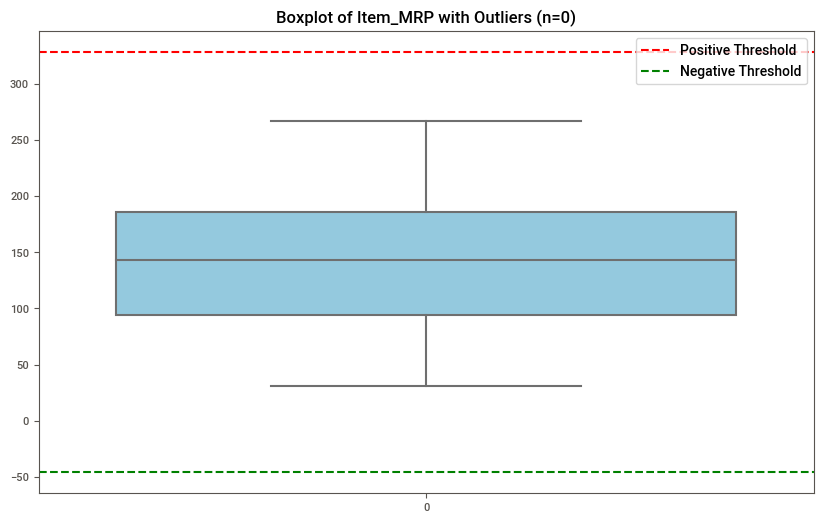

No outliers found in Item_MRP


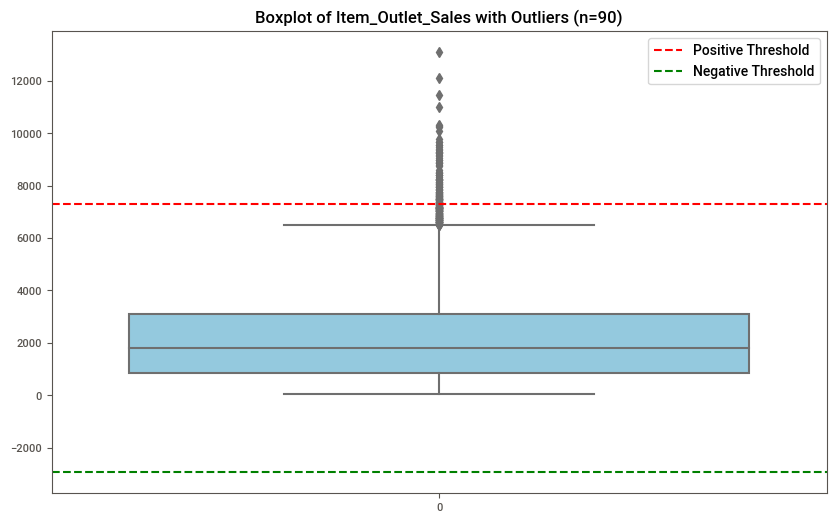

Outliers in Item_Outlet_Sales: [7968.2944, 7370.406, 7452.9652, 7696.648, 9267.936, 7763.228, 9158.079, 8114.7704, 7443.644, 7488.9184, 7833.8028, 7759.899, 7370.406, 9133.4444, 9275.9256, 10236.675, 7472.2734, 8132.0812, 11445.102, 7646.0472, 7504.2318, 8239.9408, 9371.8008, 8851.1452, 7478.2656, 8604.7992, 7590.12, 8760.5964, 7931.6754, 7534.1928, 7843.124, 9467.676, 8912.3988, 7503.566, 8138.7392, 7334.4528, 7350.432, 8063.5038, 7580.133, 8958.339, 9779.9362, 9251.9568, 10993.6896, 7741.9224, 8262.578, 8413.0488, 10256.649, 9664.7528, 8508.924, 8028.8822, 7646.0472, 8388.4142, 12117.56, 7685.9952, 9562.2196, 7602.1044, 8868.456, 8479.6288, 7425.0016, 7317.142, 8474.3024, 7393.0432, 8217.3036, 7883.072, 9069.5276, 8789.8916, 10306.584, 9554.23, 8217.3036, 7719.2852, 8062.838, 8245.2672, 13086.9648, 10072.8882, 7939.665, 8323.8316, 7873.085, 8209.314, 7322.4684, 7717.9536, 7433.657, 7943.6598, 9678.0688, 7510.224, 8417.7094, 9227.988, 8994.958, 9390.4432, 7549.5062, 7588.1226]


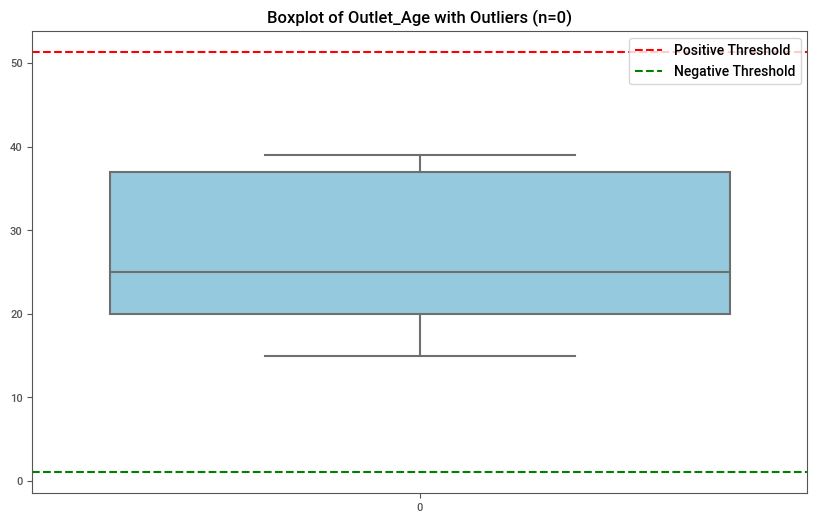

No outliers found in Outlet_Age


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a preloaded pandas DataFrame with the relevant columns

# Select numerical variables
continuous_vars = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Age']

# Define the z-score threshold for outliers
threshold = 3

# Check outliers using boxplots and z-scores
for var in continuous_vars:
    # Calculate z-scores
    z_scores = (data[var] - np.mean(data[var])) / np.std(data[var])
    outliers = np.abs(z_scores) > threshold
    num_outliers = np.sum(outliers)

    # Boxplot using seaborn for better aesthetics
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[var], color='skyblue')
    plt.title("Boxplot of {} with Outliers (n={})".format(var, num_outliers))

    # Add horizontal lines for outlier thresholds
    plt.axhline(y=np.mean(data[var]) + threshold * np.std(data[var]), color='r', linestyle='--', label='Positive Threshold')
    plt.axhline(y=np.mean(data[var]) - threshold * np.std(data[var]), color='g', linestyle='--', label='Negative Threshold')
    plt.legend()

    plt.show()

    # Display information about outliers
    if num_outliers > 0:
        print("Outliers in {}: {}".format(var, data[var][outliers].tolist()))
    else:
        print("No outliers found in {}".format(var))

# Demand Distribution Analysis of the Target Variable (Item_Outlet_Sales)

# Application Of Log Transformation

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness before log transformation: 1.18
Skewness after log transformation: -0.88


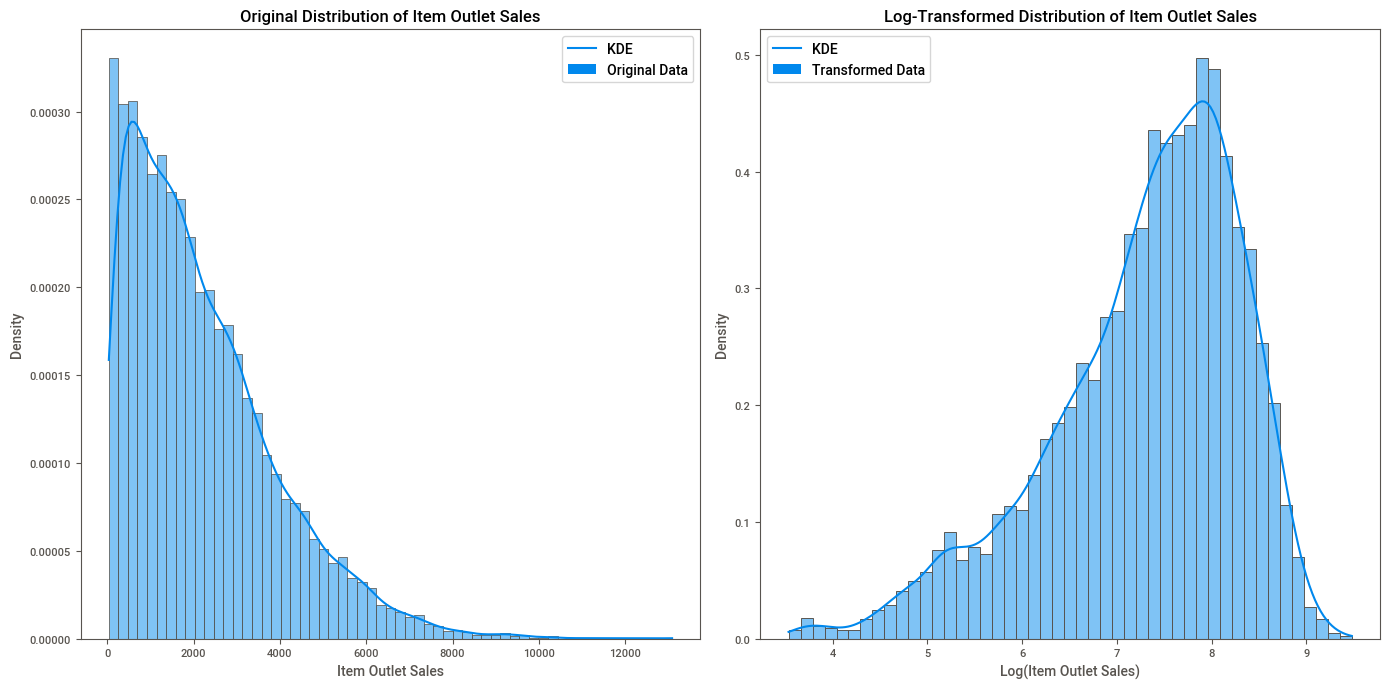

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'modified_data' is a preloaded pandas DataFrame with the column 'Item_Outlet_Sales'

# Visualize the original distribution of the target variable
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(modified_data['Item_Outlet_Sales'], kde=True, stat="density")
plt.title("Original Distribution of Item Outlet Sales")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Density")
plt.legend(["KDE", "Original Data"])

# Apply log transformation to the target variable 'Item_Outlet_Sales'
modified_data['Item_Outlet_Sales_Log'] = np.log1p(modified_data['Item_Outlet_Sales'])

# Visualize the distribution of the log-transformed target variable
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(modified_data['Item_Outlet_Sales_Log'], kde=True, stat="density")
plt.title("Log-Transformed Distribution of Item Outlet Sales")
plt.xlabel("Log(Item Outlet Sales)")
plt.ylabel("Density")
plt.legend(["KDE", "Transformed Data"])

# Get the skewness of the original and transformed data
original_skewness = modified_data['Item_Outlet_Sales'].skew()
transformed_skewness = modified_data['Item_Outlet_Sales_Log'].skew()
print(f"Skewness before log transformation: {original_skewness:.2f}")
print(f"Skewness after log transformation: {transformed_skewness:.2f}")

# Show the plots side by side
plt.tight_layout()
plt.show()

# DATA CARDINALITY
to assess the number of unique values in each categorical column to understand the data's cardinality. High cardinality features (with many unique values) might not be suitable for one-hot encoding as it would lead to a large increase in the dataset's dimensionality. In such cases, other encoding techniques like label encoding or more sophisticated methods such as target encoding, binary encoding, or embedding layers (in deep learning models) might be more appropriate.

In [ ]:
import pandas as pd

# Assuming 'modified_data' is a preloaded pandas DataFrame

# Dictionary to hold the column names and their respective number of unique values
unique_counts = {}

# List of categorical columns to be potentially encoded
categorical_columns = [
    'Item_Fat_Content',
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type',
    'Item_Type_Combined',
    'Broad_Category'
]

# Calculate the number of unique values in each categorical column
for col in categorical_columns:
    unique_counts[col] = modified_data[col].nunique()

# Display the number of unique values for each column
for col, count in unique_counts.items():
    print(f"{col} has {count} unique values")

# Based on the unique value counts, you can decide which type of encoding to use

Item_Fat_Content has 2 unique values
Item_Type has 16 unique values
Outlet_Identifier has 10 unique values
Outlet_Size has 3 unique values
Outlet_Location_Type has 3 unique values
Outlet_Type has 4 unique values
Item_Type_Combined has 3 unique values
Broad_Category has 2 unique values


In [ ]:
import pandas as pd

# Assuming 'modified_data' is a preloaded pandas DataFrame

# Apply Label Encoding to binary categorical columns
label_encoder = LabelEncoder()
modified_data['Item_Fat_Content'] = label_encoder.fit_transform(modified_data['Item_Fat_Content'])
modified_data['Broad_Category'] = label_encoder.fit_transform(modified_data['Broad_Category'])

# Columns to apply One-Hot Encoding
one_hot_columns = [
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Size',
    'Outlet_Location_Type',
    'Outlet_Type',
    'Item_Type_Combined'
]

# Apply One-Hot Encoding for the selected columns
modified_data_encoded = pd.get_dummies(modified_data, columns=one_hot_columns)

# Now, the 'modified_data_encoded' DataFrame will have the original columns replaced by their one-hot encoded counterparts
# Display the first few rows of the encoded DataFrame
display(modified_data_encoded.head(10))

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0           FDA15      9.30000                 0         0.016047  249.8092   
1           DRC01      5.92000                 1         0.019278   48.2692   
2           FDN15     17.50000                 0         0.016760  141.6180   
3           FDX07     19.20000                 1         0.000000  182.0950   
4           NCD19      8.93000                 0         0.000000   53.8614   
5           FDP36     10.39500                 1         0.000000   51.4008   
6           FDO10     13.65000                 1         0.012741   57.6588   
7           FDP10     12.98788                 0         0.127470  107.7622   
8           FDH17     16.20000                 1         0.016687   96.9726   
9           FDU28     19.20000                 1         0.094450  187.8214   

   Outlet_Establishment_Year  Item_Outlet_Sales  Outlet_Age  \
0                       1999          3735.1380          25   
1                       2009           443.4228          15   
2                       1999          2097.2700          25   
3                       1998           732.3800          26   
4                       1987           994.7052          37   
5                       2009           556.6088          15   
6                       1987           343.5528          37   
7                       1985          4022.7636          39   
8                       2002          1076.5986          22   
9                       2007          4710.5350          17   

   Item_Visibility_MeanRatio  Broad_Category  ...  \
0                   0.221565               0  ...   
1                   0.301353               1  ...   
2                   0.269092               0  ...   
3                   0.000000               0  ...   
4                   0.000000               1  ...   
5                   0.000000               0  ...   
6                   0.190592               0  ...   
7                   1.906798               0  ...   
8                   0.254201               0  ...   
9                   1.438788               0  ...   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                         True                        False   
1                        False                        False   
2                         True                        False   
3                        False                        False   
4                        False                        False   
5                        False                        False   
6                        False                        False   
7                        False                        False   
8                        False                         True   
9                        False                         True   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                        False                      False   
1                         True                      False   
2                        False                      False   
3                         True                       True   
4                         True                      False   
5                         True                      False   
6                         True                      False   
7                         True                      False   
8                        False                      False   
9                        False                      False   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                           True                          False   
1                          False                           True   
2                           True                          False   
3                          False                          False   
4                           True                          False   
5                          False                           True   
6                  

In [ ]:
# Save the modified_data_encoded DataFrame to a CSV file
modified_data_encoded.to_csv('modified_data_encoded.csv', index=False)

In [ ]:
#Drop the Item Identifier

# Assuming 'modified_data_encoded' is your DataFrame and it contains a column named 'Item_Identifier'
modified_data_encoded = modified_data_encoded.drop('Item_Identifier', axis=1)

# Now save the modified DataFrame without the 'Item_Identifier' column to a CSV file
modified_data_encoded.to_csv('modified_data_encoded.csv', index=False)

Dropping 'Item_Identifier' column before performing feature selection and data partitioning. The 'Item_Identifier' column is likely to be irrelevant for predicting sales and may not contribute significantly to the model's performance.

# CHECKING FOR CLASS IMBALANCE

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


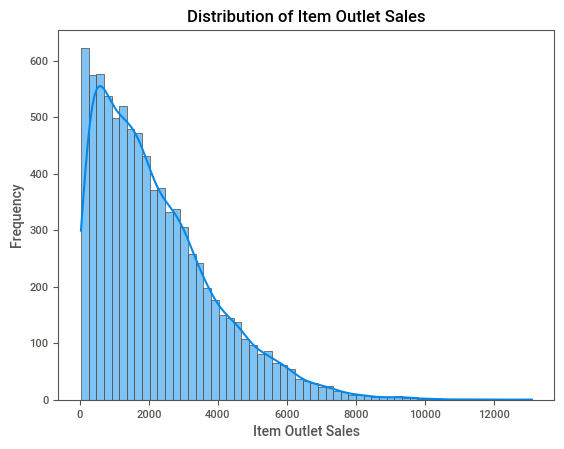

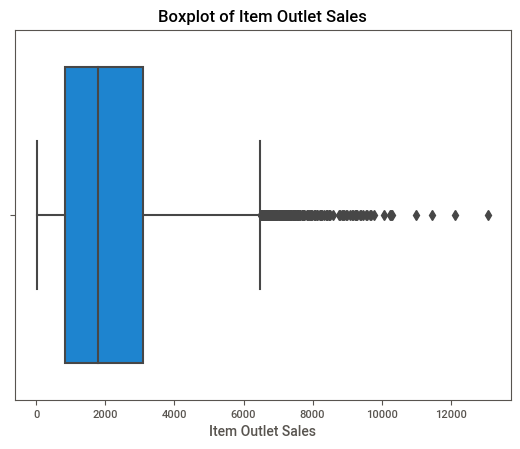

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyzing the distribution of 'Item_Outlet_Sales'
sales = modified_data_encoded['Item_Outlet_Sales']

# Summary statistics for 'Item_Outlet_Sales'
sales_description = sales.describe()
print(sales_description)

# Histogram of 'Item_Outlet_Sales'
sns.histplot(sales, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot of 'Item_Outlet_Sales' to show the range and identify any outliers
sns.boxplot(x=sales)
plt.title('Boxplot of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.show()

Since this is as a regression problem, we decided not to apply SMOTE or handle data imbalance in the same way as you would for a classification problem.

For regression tasks, Our focus is on predicting continuous values (like sales amounts) rather than classifying into discrete categories. In this context, you would assess model performance using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R-squared (R^2).

So, instead of using SMOTE to handle imbalance, we focused would be on preprocessing the data appropriately for regression modeling, selecting suitable features, and evaluating the regression model using appropriate evaluation metrics.

# FEATURE SELECTION

In [ ]:
# Assuming 'modified_data_encoded' is your DataFrame containing the encoded data
# Perform feature selection using correlation analysis or any other method
# For example, using correlation analysis to identify highly correlated features with the target variable
correlation_matrix = modified_data_encoded.corr()
target_correlation = correlation_matrix['Item_Outlet_Sales'].abs().sort_values(ascending=False)
top_features = target_correlation[1:11]  # Exclude the target variable itself

# Calculate the maximum absolute correlation coefficient
max_corr = target_correlation.iloc[0]

# Normalize the correlation coefficients and convert to percentage
top_features_percent = (top_features / max_corr) * 100

# Display the top features as a percentage
print("Top 10 most important predictors (as % with target variable):")
print(top_features_percent)


Top 10 most important predictors (as % with target variable):
Item_Outlet_Sales_Log            86.176216
Item_MRP                         56.757445
Outlet_Type_Grocery Store        41.172708
Outlet_Identifier_OUT027         31.119205
Outlet_Type_Supermarket Type3    31.119205
Outlet_Identifier_OUT010         28.488261
Outlet_Identifier_OUT019         27.724976
Outlet_Size_Small                20.891164
Outlet_Size_Medium               20.470132
Item_Visibility_MeanRatio        12.951540
Name: Item_Outlet_Sales, dtype: float64


In [ ]:
# Display the data types of each column in the DataFrame
print(modified_data_encoded.dtypes)

Item_Weight                          float64
Item_Fat_Content                       int32
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_MeanRatio            float64
Broad_Category                         int32
Perishable                             int64
Item_Outlet_Sales_Log                float64
Item_Type_Baking Goods                  bool
Item_Type_Breads                        bool
Item_Type_Breakfast                     bool
Item_Type_Canned                        bool
Item_Type_Dairy                         bool
Item_Type_Frozen Foods                  bool
Item_Type_Fruits and Vegetables         bool
Item_Type_Hard Drinks                   bool
Item_Type_Health and Hygiene            bool
Item_Type_Household                     bool
Item_Type_Meat                          bool
Item_Type_

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define the target variable
target = data['Item_Outlet_Sales']

# Get all columns that are of type float64, int64, or bool
numerical_bool_columns = data.columns[(data.dtypes == 'float64') | (data.dtypes == 'int64') | (data.dtypes == 'bool')]

# Exclude the target variable and any other feature that shouldn't be included, such as IDs or other transformed target variables
columns_to_exclude = ['Item_Outlet_Sales']
# Add the additional columns if they exist in the dataset
if 'Item_Outlet_Sales_Log' in data.columns:
    columns_to_exclude.append('Item_Outlet_Sales_Log')
if 'Item_Outlet_Sales_BoxCox' in data.columns:
    columns_to_exclude.append('Item_Outlet_Sales_BoxCox')

# Drop the columns to exclude from our feature columns
feature_columns = numerical_bool_columns.drop(columns_to_exclude)

# Create the features DataFrame
features_data = data[feature_columns]

# Proceed with the feature selection using f_regression
# Ensure you select a number of features less than or equal to the total number of features
k = min(10, features_data.shape[1])  # Adjust 'k' as needed, here it's set to 10 for example
f_selector = SelectKBest(f_regression, k=k)
f_selector.fit(features_data, target)

# Get the indices of the selected features
top_indices = f_selector.get_support(indices=True)

# Get the top features based on f_regression test
top_features_f_regression = features_data.columns[top_indices]

display("Top important predictors based on f_regression test:")
display(top_features_f_regression)

'Top important predictors based on f_regression test:'

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age', 'Item_Visibility_MeanRatio',
       'Perishable'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the feature set and the target variable
X = modified_data_encoded.drop(['Item_Outlet_Sales', 'Item_Outlet_Sales_Log'], axis=1)
y = modified_data_encoded['Item_Outlet_Sales']

# Initialize the Random Forest Regressor with a random state for reproducibility
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the entire dataset
rf.fit(X, y)

# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to view the feature importances
importances_modified_data_encoded = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_modified_data_encoded)

                              Feature  Importance
3                            Item_MRP    0.433668
41          Outlet_Type_Grocery Store    0.194526
6           Item_Visibility_MeanRatio    0.059969
2                     Item_Visibility    0.058787
0                         Item_Weight    0.053877
5                          Outlet_Age    0.035451
30           Outlet_Identifier_OUT027    0.020665
44      Outlet_Type_Supermarket Type3    0.018693
4           Outlet_Establishment_Year    0.016342
1                    Item_Fat_Content    0.007219
15    Item_Type_Fruits and Vegetables    0.006094
22              Item_Type_Snack Foods    0.006048
31           Outlet_Identifier_OUT035    0.004982
32           Outlet_Identifier_OUT045    0.004648
8                          Perishable    0.004499
13                    Item_Type_Dairy    0.004316
14             Item_Type_Frozen Foods    0.004044
33           Outlet_Identifier_OUT046    0.003876
7                      Broad_Category    0.003486


In [ ]:
# Save the feature importances to a CSV file
importances_modified_data_encoded.to_csv('feature_importances.csv', index=False)

# MODEL SELECTION AND TRAINING

In [ ]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# DATA SPLITTING INTO TEST AND TRAIN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Assuming 'modified_data_encoded' is your DataFrame which has been preprocessed
X = modified_data_encoded.drop(['Item_Outlet_Sales', 'Item_Outlet_Sales_Log'], axis=1)
y = modified_data_encoded['Item_Outlet_Sales']

# Split the dataset into training+test sets (for further splitting) and holdout test set
X_train_test, X_holdout_test, y_train_test, y_holdout_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training+test set into actual training set and validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

# Now, the actual size of the training set is 60% of the original dataset
# Validation is 20% of the original dataset
# Testing (holdout) is 20% of the original dataset

# Print the sizes of each dataset to confirm the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_validation.shape[0]} samples")
print(f"Testing set size: {X_holdout_test.shape[0]} samples")

Training set size: 5113 samples
Validation set size: 1705 samples
Testing set size: 1705 samples


In [ ]:
#import numpy as np
#import pandas as pd
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
#from keras.models import Sequential
#from keras.layers import Dense
#import tensorflow as tf

# Assuming 'modified_data_encoded' is your DataFrame which has been preprocessed
#X = modified_data_encoded.drop(['Item_Outlet_Sales', 'Item_Outlet_Sales_Log'], axis=1)
#y = modified_data_encoded['Item_Outlet_Sales']

# Split the dataset into training and test sets first (80% training, 20% test)
#X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training+test set into training and validation sets (75% training, 25% validation of the training+test set)
#X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

# DATA PREPARATION FOR MACHINE LEARNING

In [ ]:
# One-hot encode the categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_validation = pd.get_dummies(X_validation, drop_first=True)
X_holdout_test = pd.get_dummies(X_holdout_test, drop_first=True)

# Align the dataframes by the columns, this ensures that they all have the same one-hot encoded columns
X_train, X_validation = X_train.align(X_validation, join='inner', axis=1)
X_train, X_holdout_test = X_train.align(X_holdout_test, join='inner', axis=1)
X_validation, X_holdout_test = X_validation.align(X_holdout_test, join='inner', axis=1)

# Now you should be able to convert to float32 without issues
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
X_holdout_test = X_holdout_test.astype('float32')

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_validation)
print(f"Linear Regression MSE: {mean_squared_error(y_validation, lr_predictions)}")

# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_validation)
print(f"Random Forest MSE: {mean_squared_error(y_validation, rf_predictions)}")

# XGBoost Model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_validation)
print(f"XGBoost MSE: {mean_squared_error(y_validation, xgb_predictions)}")

# LightGBM Model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_validation)
print(f"LightGBM MSE: {mean_squared_error(y_validation, lgbm_predictions)}")

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_validation)
print(f"Gradient Boosting MSE: {mean_squared_error(y_validation, gb_predictions)}")

Linear Regression MSE: 1321742.1309090448
Random Forest MSE: 1335498.7099234236
XGBoost MSE: 1520697.3945390284
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 5113, number of used features: 48
[LightGBM] [Info] Start training from score 2202.640241
LightGBM MSE: 1303567.6631143836
Gradient Boosting MSE: 1214457.6604077907


# HYPERPARAMETERS TUNING

In [ ]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [ ]:
import kerastuner as kt

C:\Users\Dell\AppData\Local\Temp\ipykernel_12556\1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow import keras
import keras_tuner as kt

# Assuming X_train, X_test, y_train, y_test have already been defined

# Hyperparameter tuning for Random Forest
rf_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1
)
print("Tuning Random Forest...")
rf_random_search.fit(X_train, y_train)

Tuning Random Forest...


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_pa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D17715D2D0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D1156A5B10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D1156A5510>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D11568EA10>},
                   random_state=42)

In [ ]:
# Hyperparameter tuning for XGBoost
xgb_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10)
}

xgb_random_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1
)
print("Tuning XGBoost...")
xgb_random_search.fit(X_train, y_train)

Tuning XGBoost...


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D11568DC10>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D1156A4350>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D1120DF610>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D1156B5550>},
                   random_state=42)

In [ ]:
from scipy.stats import randint, uniform
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
lgbm_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(-1, 15),
    'learning_rate': uniform(0.01, 0.3),
    'num_leaves': randint(20, 300),
    'min_child_samples': randint(10, 200),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Set up the randomized search with cross-validation
lgbm_random_search = RandomizedSearchCV(
    LGBMRegressor(random_state=42),
    param_distributions=lgbm_param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1
)

print("Tuning LightGBM...")
lgbm_random_search.fit(X_train, y_train)

Tuning LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 5113, number of used features: 44
[LightGBM] [Info] Start training from score 2202.640241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D11576CF90>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D1156B5650>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_dis...
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D11576CED0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D1156A6F10>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D11576F010>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D11576FF10>},
                   random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter tuning for Gradient Boosting
gb_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

gb_random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1
)
print("Tuning Gradient Boosting...")
gb_random_search.fit(X_train, y_train)


Tuning Gradient Boosting...


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D11568D650>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D11569BDD0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_sa...screte_frozen object at 0x000001D1156D5810>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D1156D7250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D11576E690>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D1156D5B90>},
                   random_state=42)

# RETREIVING THE BEST MODEL

In [ ]:
# Retrieve the best models
print("Retrieving Best Models...")
best_rf_model = rf_random_search.best_estimator_
best_xgb_model = xgb_random_search.best_estimator_
best_lgbm_model = lgbm_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_

Retrieving Best Models...


# MODEL EVALUATION

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate the best models using the holdout test set
print("Evaluating Models on Holdout Test Set...")
rf_predictions = best_rf_model.predict(X_holdout_test)
xgb_predictions = best_xgb_model.predict(X_holdout_test)
lgbm_predictions = best_lgbm_model.predict(X_holdout_test)
gb_predictions = best_gb_model.predict(X_holdout_test)

# Calculate additional metrics for each model using the holdout test set
def calculate_performance_metrics(y_true, predictions):
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, predictions)
    r2 = r2_score(y_true, predictions)
    return mse, rmse, mae, r2

# Random Forest metrics
rf_mse, rf_rmse, rf_mae, rf_r2 = calculate_performance_metrics(y_holdout_test, rf_predictions)
print("Random Forest Metrics on Holdout Test Set:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}\n")

# XGBoost metrics
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = calculate_performance_metrics(y_holdout_test, xgb_predictions)
print("XGBoost Metrics on Holdout Test Set:")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"MAE: {xgb_mae}")
print(f"R-squared: {xgb_r2}\n")

# LightGBM metrics
lgbm_mse, lgbm_rmse, lgbm_mae, lgbm_r2 = calculate_performance_metrics(y_holdout_test, lgbm_predictions)
print("LightGBM Metrics on Holdout Test Set:")
print(f"MSE: {lgbm_mse}")
print(f"RMSE: {lgbm_rmse}")
print(f"MAE: {lgbm_mae}")
print(f"R-squared: {lgbm_r2}\n")

# Gradient Boosting metrics
gb_mse, gb_rmse, gb_mae, gb_r2 = calculate_performance_metrics(y_holdout_test, gb_predictions)
print("Gradient Boosting Metrics on Holdout Test Set:")
print(f"MSE: {gb_mse}")
print(f"RMSE: {gb_rmse}")
print(f"MAE: {gb_mae}")
print(f"R-squared: {gb_r2}")

Evaluating Models on Holdout Test Set...
Random Forest Metrics on Holdout Test Set:
MSE: 1067472.2296311946
RMSE: 1033.185476877794
MAE: 727.038866326244
R-squared: 0.6072538683400719

XGBoost Metrics on Holdout Test Set:
MSE: 1047754.8163333233
RMSE: 1023.5989528781881
MAE: 725.5346896137709
R-squared: 0.6145083313454042

LightGBM Metrics on Holdout Test Set:
MSE: 1033065.896093397
RMSE: 1016.3984927642293
MAE: 712.7428263521932
R-squared: 0.619912702946233

Gradient Boosting Metrics on Holdout Test Set:
MSE: 1054051.9801523695
RMSE: 1026.670336647733
MAE: 718.9365986829499
R-squared: 0.6121914685159011


# CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform K-fold Cross-validation and calculate additional metrics
def cross_validation_metrics(model, X, y, cv, scoring):
    # Perform K-fold Cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)

    # Convert scores to positive values (since they are negative MSE)
    scores = -scores

    # Calculate mean and standard deviation of the MSE
    mse_cv_mean = scores.mean()
    mse_cv_std = scores.std()

    # Calculate RMSE from MSE
    rmse_cv_mean = np.sqrt(mse_cv_mean)
    rmse_cv_std = np.sqrt(mse_cv_std)

    # Return the metrics
    return mse_cv_mean, mse_cv_std, rmse_cv_mean, rmse_cv_std

# Define number of folds
k = 5

# Calculate and print metrics for each model
print("Cross-Validation Metrics:")

# Random Forest
rf_mse_cv, rf_mse_std, rf_rmse_cv, rf_rmse_std = cross_validation_metrics(best_rf_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
print("\nRandom Forest:")
print(f"Mean MSE: {rf_mse_cv}, Std MSE: {rf_mse_std}")
print(f"Mean RMSE: {rf_rmse_cv}, Std RMSE: {rf_rmse_std}")

# XGBoost
xgb_mse_cv, xgb_mse_std, xgb_rmse_cv, xgb_rmse_std = cross_validation_metrics(best_xgb_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
print("\nXGBoost:")
print(f"Mean MSE: {xgb_mse_cv}, Std MSE: {xgb_mse_std}")
print(f"Mean RMSE: {xgb_rmse_cv}, Std RMSE: {xgb_rmse_std}")

# LightGBM
lgbm_mse_cv, lgbm_mse_std, lgbm_rmse_cv, lgbm_rmse_std = cross_validation_metrics(best_lgbm_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
print("\nLightGBM:")
print(f"Mean MSE: {lgbm_mse_cv}, Std MSE: {lgbm_mse_std}")
print(f"Mean RMSE: {lgbm_rmse_cv}, Std RMSE: {lgbm_rmse_std}")

# Gradient Boosting
gb_mse_cv, gb_mse_std, gb_rmse_cv, gb_rmse_std = cross_validation_metrics(best_gb_model, X_train, y_train, cv=k, scoring='neg_mean_squared_error')
print("\nGradient Boosting:")
print(f"Mean MSE: {gb_mse_cv}, Std MSE: {gb_mse_std}")
print(f"Mean RMSE: {gb_rmse_cv}, Std RMSE: {gb_rmse_std}")

Cross-Validation Metrics:

Random Forest:
Mean MSE: 1230609.7916162512, Std MSE: 77844.60566361956
Mean RMSE: 1109.3285318679275, Std RMSE: 279.0064616879322

XGBoost:
Mean MSE: 1226234.6408116526, Std MSE: 74433.17898999782
Mean RMSE: 1107.3547944591437, Std RMSE: 272.8244472000224
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1087
[LightGBM] [Info] Number of data points in the train set: 4090, number of used features: 42
[LightGBM] [Info] Start training from score 2212.415634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

# ERROR ANALYSIS

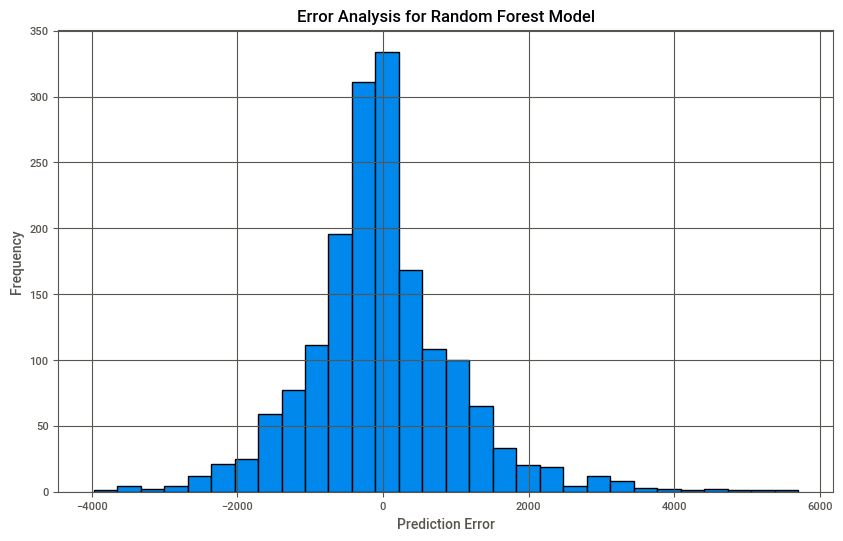

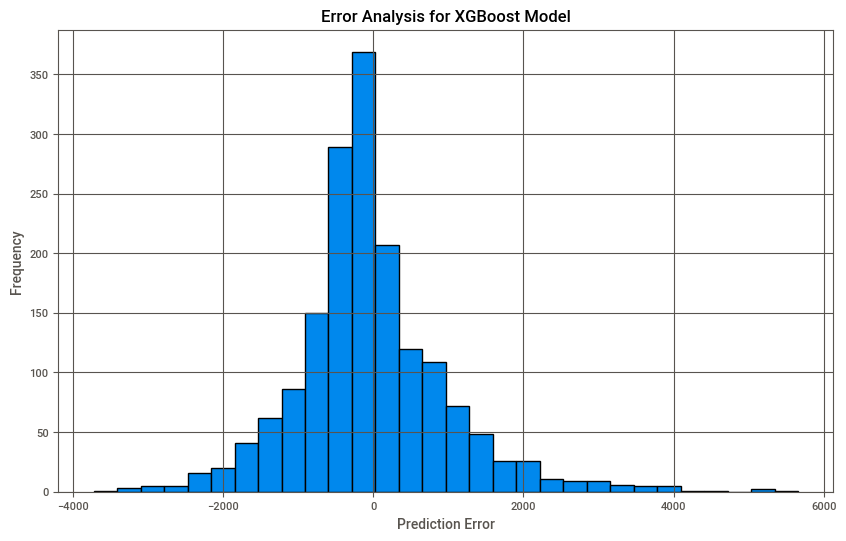

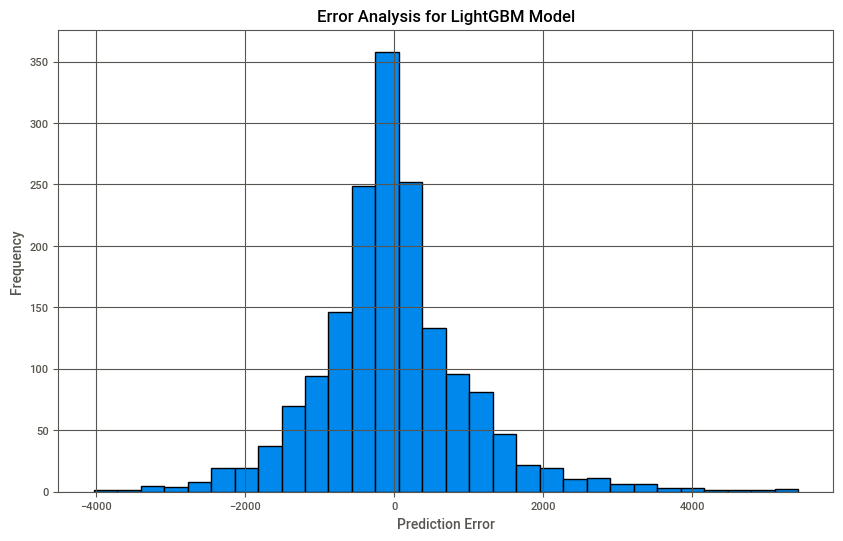

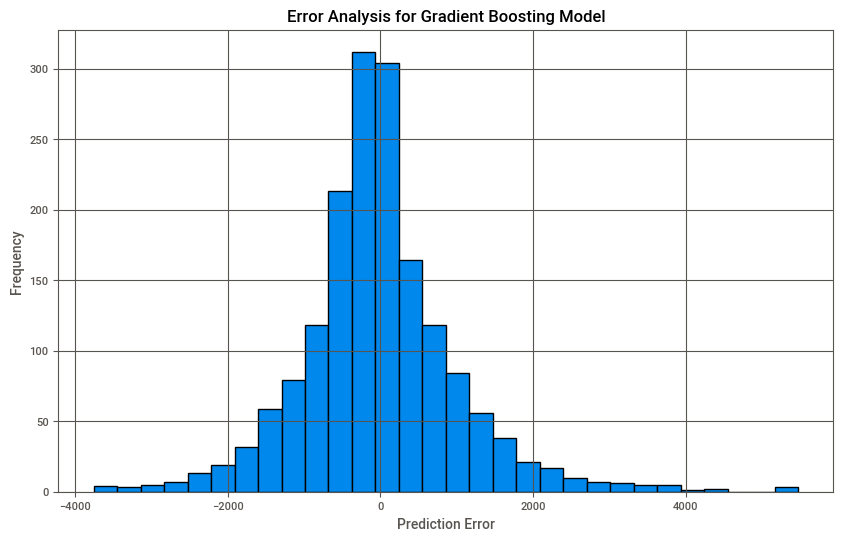

In [ ]:
import matplotlib.pyplot as plt

# Function to calculate and plot errors for a given model
def plot_error_analysis(y_true, predictions, model_name):
    # Calculate errors
    errors = y_true - predictions

    # Plot histogram of errors
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=30, edgecolor='black')
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.title(f"Error Analysis for {model_name} Model")
    plt.grid(True)
    plt.show()

# Assuming we already have the predictions from the holdout test set
# Random Forest Error Analysis
plot_error_analysis(y_holdout_test, rf_predictions, "Random Forest")

# XGBoost Error Analysis
plot_error_analysis(y_holdout_test, xgb_predictions, "XGBoost")

# LightGBM Error Analysis
plot_error_analysis(y_holdout_test, lgbm_predictions, "LightGBM")

# Gradient Boosting Error Analysis
plot_error_analysis(y_holdout_test, gb_predictions, "Gradient Boosting")

# FEATURE IMPORTANCE VISUALIZATION

Feature Importance for LightGBM Model:
Outlet_Type_Supermarket Type2: 0
Outlet_Size_High: 0
Item_Type_Starchy Foods: 0
Item_Type_Seafood: 0
Item_Type_Others: 0
Item_Type_Meat: 0
Item_Type_Breads: 0
Item_Type_Breakfast: 0
Item_Type_Health and Hygiene: 0
Item_Type_Hard Drinks: 0
Item_Type_Combined_Non-Consumable: 1
Outlet_Identifier_OUT019: 1
Item_Type_Combined_Drinks: 2
Outlet_Identifier_OUT017: 2
Item_Type_Soft Drinks: 2
Outlet_Identifier_OUT018: 3
Item_Type_Household: 4
Outlet_Identifier_OUT013: 6
Item_Type_Baking Goods: 8
Outlet_Identifier_OUT010: 8
Item_Type_Fruits and Vegetables: 10
Item_Type_Dairy: 11
Item_Type_Canned: 12
Outlet_Identifier_OUT035: 14
Item_Type_Snack Foods: 14
Outlet_Identifier_OUT049: 17
Outlet_Location_Type_Tier 1: 20
Outlet_Identifier_OUT046: 22
Item_Type_Frozen Foods: 24
Outlet_Location_Type_Tier 2: 26
Outlet_Location_Type_Tier 3: 30
Outlet_Identifier_OUT045: 30
Broad_Category: 35
Outlet_Size_Medium: 37
Outlet_Type_Supermarket Type3: 38
Item_Fat_Content: 39
Out

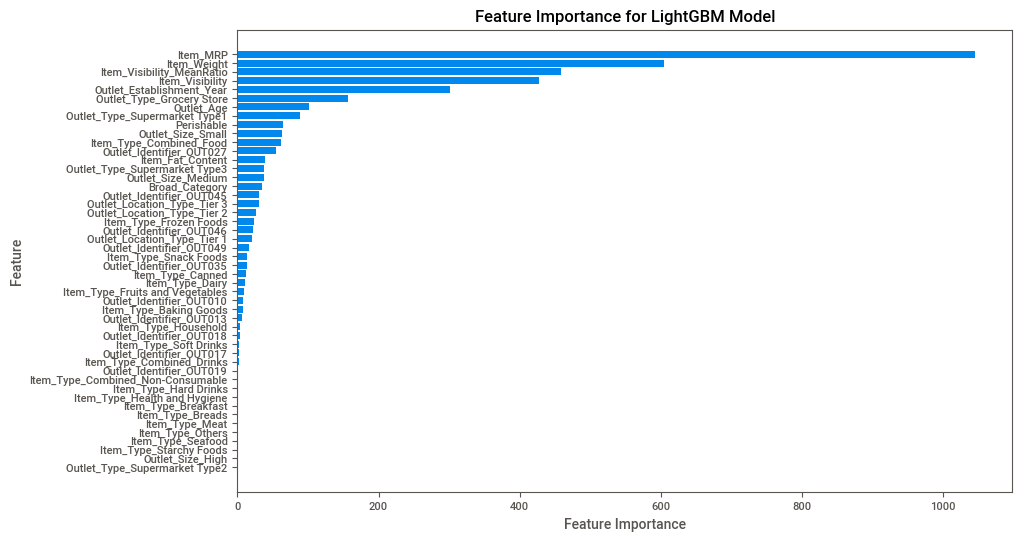

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming best_lgbm_model is the LightGBM model
feature_importance_lgbm = best_lgbm_model.feature_importances_

# Sorting feature indices based on their importance
sorted_idx_lgbm = np.argsort(feature_importance_lgbm)

# Printing textual representation
print("Feature Importance for LightGBM Model:")
for idx in sorted_idx_lgbm:
    print(f"{X_train.columns[idx]}: {feature_importance_lgbm[idx]}")

# Plotting feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx_lgbm], feature_importance_lgbm[sorted_idx_lgbm])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for LightGBM Model")
plt.show()

# Given these insights, We focused on the high-impact outlet characteristics in our analysis and potentially consider simplifying your model by removing or consolidating low-impact features. It's also important to conduct further analyses, such as partial dependency plots or SHAP (SHapley Additive exPlanations) values, to understand the nature of the relationship between these important features and the demand forecast (e.g., linear, non-linear, threshold effects).

Finally, incorporate the findings from our feature importance analysis into your report, highlighting how specific outlet characteristics like the establishment year, location, and type significantly impact demand forecasting. This can guide business strategy and decision-making for optimizing outlet performance.

In [ ]:
pip install shap

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# Examining of the impact of outlet characteristics on the demand forecasting model's predictive accuracy using SHAP values.

[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 49
[LightGBM] [Info] Start training from score 2202.365232


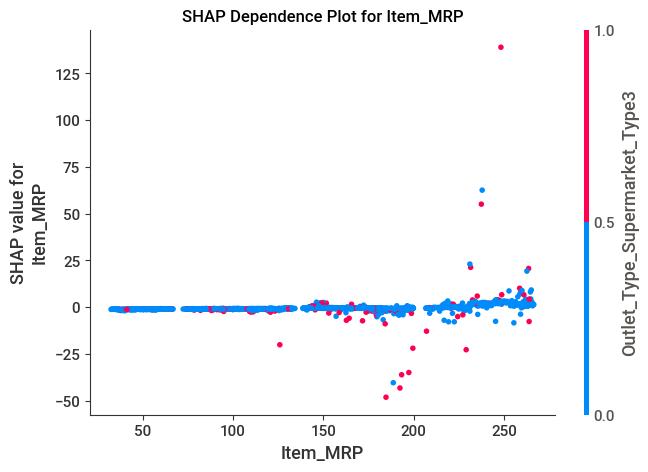

[LightGBM] [Info] Total Bins 1341
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 39
[LightGBM] [Info] Start training from score 2202.365232
RMSE of the simplified model: 32.20366260991057
RMSE of the original model: 32.16437913359701
Feature Importance for the Original Model:
Item_Outlet_Sales_Log: 1787
Item_MRP: 289
Item_Visibility: 225
Item_Visibility_MeanRatio: 198
Item_Weight: 195
Outlet_Establishment_Year: 54
Perishable: 33
Item_Fat_Content: 17
Broad_Category: 16
Outlet_Location_Type_Tier_3: 12
Outlet_Size_Medium: 12
Item_Type_Frozen_Foods: 11
Outlet_Location_Type_Tier_2: 11
Item_Type_Dairy: 10
Item_Type_Combined_Food: 9
Item_Type_Fruits_and_Vegetables: 9
Item_Type_Snack_Foods: 9
Item_Type_Combined_Non_Consumable: 9
Item_Type_Breads: 8
Outlet_Identifier_OUT045: 8
Outlet_Size_Small: 8
Outlet_Identifier_OUT049: 7
Item_Type_Meat: 7
Item_Type_Canned: 7
Item_Type_Others: 6
Item_Type_Baking_Goods: 5
Item_Type_Household: 5
Outlet_Location_Type_Ti

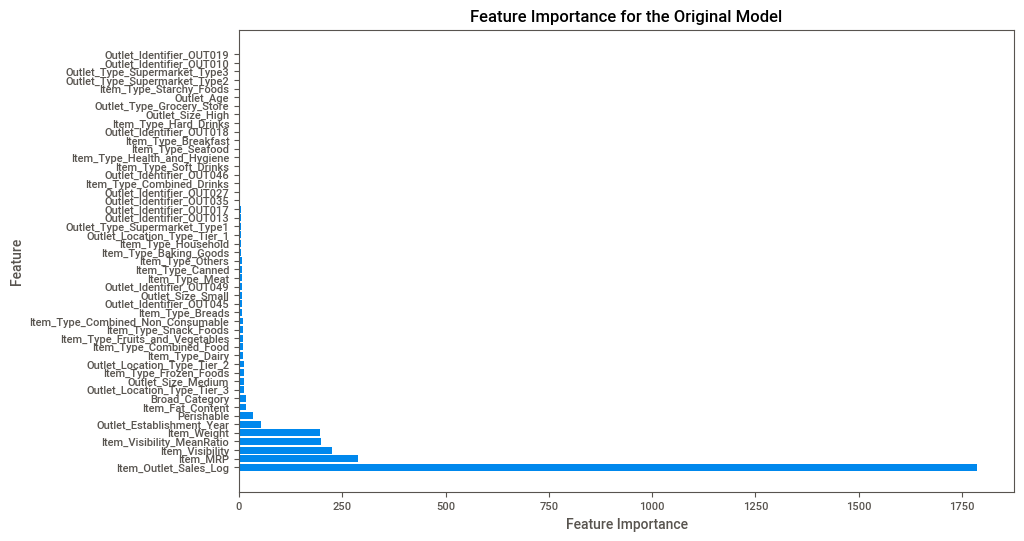

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Assuming 'modified_data_encoded' is a pandas DataFrame with your data and 'Item_Outlet_Sales' is the target variable

# Clean the feature names in the dataset to remove any whitespaces
modified_data_encoded.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in modified_data_encoded.columns]

# Prepare the data
X = modified_data_encoded.drop('Item_Outlet_Sales', axis=1)
y = modified_data_encoded['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the LightGBM model with 'force_row_wise' set to true
lgb_model = lgb.LGBMRegressor(force_row_wise=True)
lgb_model.fit(X_train, y_train)

# SHAP values
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the 'Item_MRP' feature, which has the highest feature importance
shap.dependence_plot('Item_MRP', shap_values, X_test, show=False)
plt.title('SHAP Dependence Plot for Item_MRP')
plt.show()

# Create a list of low-impact features based on feature importance
low_impact_features = [
    'Outlet_Type_Supermarket_Type2',
    'Outlet_Size_High',
    'Item_Type_Starchy_Foods',
    'Item_Type_Seafood',
    'Item_Type_Others',
    'Item_Type_Meat',
    'Item_Type_Breads',
    'Item_Type_Breakfast',
    'Item_Type_Health_and_Hygiene',
    'Item_Type_Hard_Drinks'
    # Add any additional features with zero importance if needed
]

# Create a new DataFrame without low-impact features
X_train_simplified = X_train.drop(low_impact_features, axis=1)
X_test_simplified = X_test.drop(low_impact_features, axis=1)

# Retrain the LightGBM model on the simplified dataset, also with 'force_row_wise' set to true
lgb_model_simplified = lgb.LGBMRegressor(force_row_wise=True)
lgb_model_simplified.fit(X_train_simplified, y_train)

# Evaluate the simplified model's performance
y_pred_simplified = lgb_model_simplified.predict(X_test_simplified)
rmse_simplified = np.sqrt(mean_squared_error(y_test, y_pred_simplified))
print(f"RMSE of the simplified model: {rmse_simplified}")

# Compare with the original model's performance
y_pred_original = lgb_model.predict(X_test)
rmse_original = np.sqrt(mean_squared_error(y_test, y_pred_original))
print(f"RMSE of the original model: {rmse_original}")

# Print feature importance for the original model
print("Feature Importance for the Original Model:")
feature_importance_original = lgb_model.feature_importances_
sorted_idx_original = np.argsort(feature_importance_original)[::-1]  # Reverse the order to get highest to lowest importance
for idx in sorted_idx_original:
    print(f"{X_train.columns[idx]}: {feature_importance_original[idx]}")

# Plot feature importance for the original model
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx_original], feature_importance_original[sorted_idx_original])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for the Original Model")
plt.show()


# Interpretation of the Results:

The fact that the RMSE difference between the simplified and original models is minimal (32.2037 vs. 32.1644) suggests that the simplification process (removal of features) didn't significantly degrade the model's performance. This indicates that the removed features had little to no predictive power.

Looking at the feature importances, it's clear that Item_Outlet_Sales_Log is the most significant contributor. However, having a feature that is a log-transformation of the target variable seems incorrect unless it's representing past sales data for time-series forecasting. If it's not an error, it would need careful interpretation.

Finally, the features with zero importance (Item_Type_Breakfast, Outlet_Identifier_OUT018, etc.) did not influence the model's predictions. This could be due to a lack of variation in these features, a lack of correlation with the target variable, or because their effects are captured by other features.

# MODEL DEPLOYMENT TO FLASK

In [ ]:
pip install Flask-HTTPAuth

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install flask

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!python server.py

python: can't open file 'C:\\Users\\Dell\\Desktop\\MSC PROJECT\\MACHINE LEARNING\\server.py': [Errno 2] No such file or directory


# Define and train the models, and save them:

In [ ]:
import lightgbm as lgb
import joblib

# Example training process
# This is where you would define your training data and parameters for the models
# X_train and y_train should be your features and labels for training
# For demonstration, I'm assuming these are already defined and preprocessed

# Define and train the original model
original_model = lgb.LGBMRegressor()
original_model.fit(X_train, y_train)

# Define and train the simplified model
# Assume "simplified_train" is a dataset with fewer features
simplified_model = lgb.LGBMRegressor()
simplified_model.fit(X_train_simplified, y_train)  # Use X_train_simplified instead of simplified_train

# After training, save the models
joblib.dump(original_model, 'lgb_model_original.pkl')
joblib.dump(simplified_model, 'lgb_model_simplified.pkl')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1361
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 49
[LightGBM] [Info] Start training from score 2202.365232
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1341
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 39
[LightGBM] [Info] Start training from score 2202.365232


['lgb_model_simplified.pkl']

# Load Flask and define routes:

In [ ]:
from flask import Flask, request, jsonify
import joblib
import logging

app = Flask(__name__)

# Configure logging
logging.basicConfig(level=logging.DEBUG)

# Load models
try:
    original_model = joblib.load('lgb_model_original.pkl')
    simplified_model = joblib.load('lgb_model_simplified.pkl')
except Exception as e:
    app.logger.error("Error loading models: %s", e)
    # Optionally, you could set a flag to prevent predictions when models are not loaded.

@app.route('/predict', methods=['POST'])
def predict():
    if not original_model or not simplified_model:
        return jsonify({'error': 'Model is not loaded'}), 500

    data = request.get_json()

    # Validate input data
    if not data:
        return jsonify({'error': 'No JSON data provided'}), 400

    model_type = data.get('model_type')
    features = data.get('features')

    if not model_type or model_type not in ['original', 'simplified']:
        return jsonify({'error': 'Invalid or missing model_type'}), 400

    if not features:
        return jsonify({'error': 'Missing features data'}), 400

    # Make predictions
    try:
        if model_type == 'original':
            prediction = original_model.predict([features])
        else:
            prediction = simplified_model.predict([features])

        return jsonify({'prediction': prediction.tolist()}), 200
    except Exception as e:
        app.logger.error("Prediction failed: %s", e)
        return jsonify({'error': f'Prediction failed: {str(e)}'}), 500

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1

To exit: use 'exit', 'quit', or Ctrl-D.
